# **Zeitreihen Analyse**

*Fabian Niebelschütz*

---

# Univariate Zeitreihenanalyse

# Übersicht: Tests und Methoden der Zeitreihenanalyse

## 1. Bestimmung der Integrationsordnung
### Augmented Dickey-Fuller Test (ADF-Test)
- Testet die Nullhypothese, dass eine Einheitswurzel vorliegt (Zeitreihe ist nicht-stationär)
- Alternative Hypothese: Zeitreihe ist stationär
- Interpretation: p-Wert < 0.05 bedeutet Ablehnung der Nullhypothese → Zeitreihe ist stationär

### Phillips-Perron Test (PP-Test)
- Ähnlich wie ADF-Test, aber robuster gegenüber Heteroskedastizität
- Testet ebenfalls auf Einheitswurzel
- Interpretation: wie beim ADF-Test

### Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS-Test)
- Umgekehrter Ansatz im Vergleich zu ADF und PP
- Nullhypothese: Zeitreihe ist stationär
- Alternative Hypothese: Zeitreihe hat eine Einheitswurzel
- Interpretation: p-Wert < 0.05 bedeutet Ablehnung der Nullhypothese → Zeitreihe ist nicht-stationär

In [3]:
########################################################
#-----------------------   1.   -----------------------#
#--------- Bestimmung der Integrationsordnung ---------#
########################################################


#-#-#-#-#-#-#-#-#-#-#-# Librarys #-#-#-#-#-#-#-#-#-#-#-#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

#-#-#-#-#-#-#-#-#-# Daten einlesen #-#-#-#-#-#-#-#-#-#-#
data_MBG_DE = pd.read_csv('/Users/fabi/Documents/BBA/6_Semester/Vertiefung_BBA/Zeitreihenanalyse_Menden/THWS_Reihenanalysen/data/data_Zeitreihe_Fabian_mercedes_benz_historical_data.csv', 
                   skiprows=3, 
                   header=None, 
                   names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], 
                   parse_dates=[0], 
                   index_col=0)  

# Konvertiere alle numerischen Spalten zu Float
for col in data_MBG_DE.columns:
    data_MBG_DE[col] = pd.to_numeric(data_MBG_DE[col], errors='coerce')

# !!! WICHTIG !!!
# Die Zeitreihe Verwendet die Close Spalte
Zeitreihe_MBG_DE = data_MBG_DE["Close"]


#------------------------------------------------------#
#-#-#-#-#-#-#-# Augmented Dickey-Fuller  #-#-#-#-#-#-#-#
#------------------------------------------------------#
def adf_test(timeseries):
    print('Augmented Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    
    # Ausgabe der Testergebnisse
    output = pd.Series(
        [result[0], result[1], result[2], result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']],
        index=['Test-Statistik', 'p-Wert', 'Lags verwendet', 'Anzahl der Beobachtungen', 'Kritischer Wert (1%)', 
               'Kritischer Wert (5%)', 'Kritischer Wert (10%)']
    )
    
    print(output)
    
    # Interpretation
    if result[1] <= 0.05:
        print("Schlussfolgerung: Die Nullhypothese wird abgelehnt. Die Zeitreihe ist stationär.")
    else:
        print("Schlussfolgerung: Die Nullhypothese kann nicht abgelehnt werden. Die Zeitreihe ist nicht-stationär.")
    
    return result


#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-#-#-#-# KPSS #-#-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#
def kpss_test(timeseries):
    print('KPSS-Test:')
    
    # KPSS-Test durchführen
    try:
        result = kpss(timeseries, regression='c')
        
        # Ausgabe der Testergebnisse
        output = pd.Series(
            [result[0], result[1], result[2], result[3]['10%'], result[3]['5%'], result[3]['2.5%'], result[3]['1%']],
            index=['Test-Statistik', 'p-Wert', 'Lags verwendet', 'Kritischer Wert (10%)', 
                   'Kritischer Wert (5%)', 'Kritischer Wert (2.5%)', 'Kritischer Wert (1%)']
        )
        
        print(output)
        
        # Interpretation
        if result[1] <= 0.05:
            print("Schlussfolgerung: Die Nullhypothese wird abgelehnt. Die Zeitreihe ist nicht-stationär.")
        else:
            print("Schlussfolgerung: Die Nullhypothese kann nicht abgelehnt werden. Die Zeitreihe ist stationär.")
            
    except Exception as e:
        print(f"Fehler beim KPSS-Test: {e}")
    
    return result


#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-# Phillips-Perron  #-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#
def pp_test(timeseries):
    print('Phillips-Perron Test:')
    
    # Phillips-Perron Test durchführen
    try:
        # Wir nutzen die PP-Test Implementierung von statsmodels
        result = sm.tsa.stattools.phillips_perron(timeseries)
        
        # Ausgabe der Testergebnisse
        output = pd.Series(
            [result[0], result[1]],
            index=['Test-Statistik', 'p-Wert']
        )
        
        print(output)
        
        # Interpretation
        if result[1] <= 0.05:
            print("Schlussfolgerung: Die Nullhypothese wird abgelehnt. Die Zeitreihe ist stationär.")
        else:
            print("Schlussfolgerung: Die Nullhypothese kann nicht abgelehnt werden. Die Zeitreihe ist nicht-stationär.")
            
    except Exception as e:
        print(f"Fehler beim Phillips-Perron Test: {e}")
    
    return result


#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-# Test  Durchführung #-#-#-#-#-#-#-#-#
#------------------------------------------------------#
print("=== Tests für die Originalzeitreihe ===")
adf_result = adf_test(Zeitreihe_MBG_DE.dropna())
kpss_result = kpss_test(Zeitreihe_MBG_DE.dropna())
try:
    pp_result = pp_test(Zeitreihe_MBG_DE.dropna())
except:
    print("Phillips-Perron Test konnte nicht durchgeführt werden.")

=== Tests für die Originalzeitreihe ===
Augmented Dickey-Fuller Test:
Test-Statistik                -0.957215
p-Wert                         0.768548
Lags verwendet                14.000000
Anzahl der Beobachtungen    7291.000000
Kritischer Wert (1%)          -3.431247
Kritischer Wert (5%)          -2.861936
Kritischer Wert (10%)         -2.566981
dtype: float64
Schlussfolgerung: Die Nullhypothese kann nicht abgelehnt werden. Die Zeitreihe ist nicht-stationär.
KPSS-Test:
Test-Statistik             9.647782
p-Wert                     0.010000
Lags verwendet            53.000000
Kritischer Wert (10%)      0.347000
Kritischer Wert (5%)       0.463000
Kritischer Wert (2.5%)     0.574000
Kritischer Wert (1%)       0.739000
dtype: float64
Schlussfolgerung: Die Nullhypothese wird abgelehnt. Die Zeitreihe ist nicht-stationär.
Phillips-Perron Test:
Fehler beim Phillips-Perron Test: module 'statsmodels.tsa.stattools' has no attribute 'phillips_perron'
Phillips-Perron Test konnte nicht durchgefüh

/var/folders/mb/l0xd46hd0253gyf6hjncbj740000gn/T/ipykernel_6266/1668561230.py:66: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(timeseries, regression='c')


---

## 2. Transformation zur Stationarität
### Differenzierung
- Erste Differenz: $y_t - y_{t-1}$
- Zweite Differenz: $(y_t - y_{t-1}) - (y_{t-1} - y_{t-2})$
- Bestimmt den d-Wert im ARIMA(p,d,q)-Modell

### Logarithmische Transformation
- Anwendung bei ungleicher Varianz
- Stabilisiert die Varianz
- Logarithmische Wachstumsrate: $g_t := \ln(x_t) - \ln(x_{t-1})$

### Moving Average
- Gleitender Durchschnitt zur Glättung der Zeitreihe
- Formel: $\bar{y}_t = \frac{y_t + y_{t-1} + ... + y_{t-T+1}}{T}$

### Simple Exponential Smoothing
- Gewichteter gleitender Durchschnitt
- Neuere Beobachtungen erhalten höhere Gewichtung
- Formel: $\hat{y}_{t+1} = \alpha \times y_t + (1-\alpha) \times \hat{y}_t$ mit $0 \leq \alpha \leq 1$

### HP-Filter (Hodrick-Prescott-Filter)
- Zerlegt Zeitreihe in Trend- und Zykluskomponente
- Minimierungsproblem: 
  $\min_{\{y_t^T\}} \sum_{t=1}^T (y_t - y_t^T)^2 + \lambda \sum_{t=2}^{T-1} [(y_{t+1}^T - y_t^T) - (y_t^T - y_{t-1}^T)]^2$
- λ-Parameter: 1.600 für Quartalsdaten, 6,25 für Jahresdaten, 134.916 für Monatsdaten

1. Differenzierung
-----------------


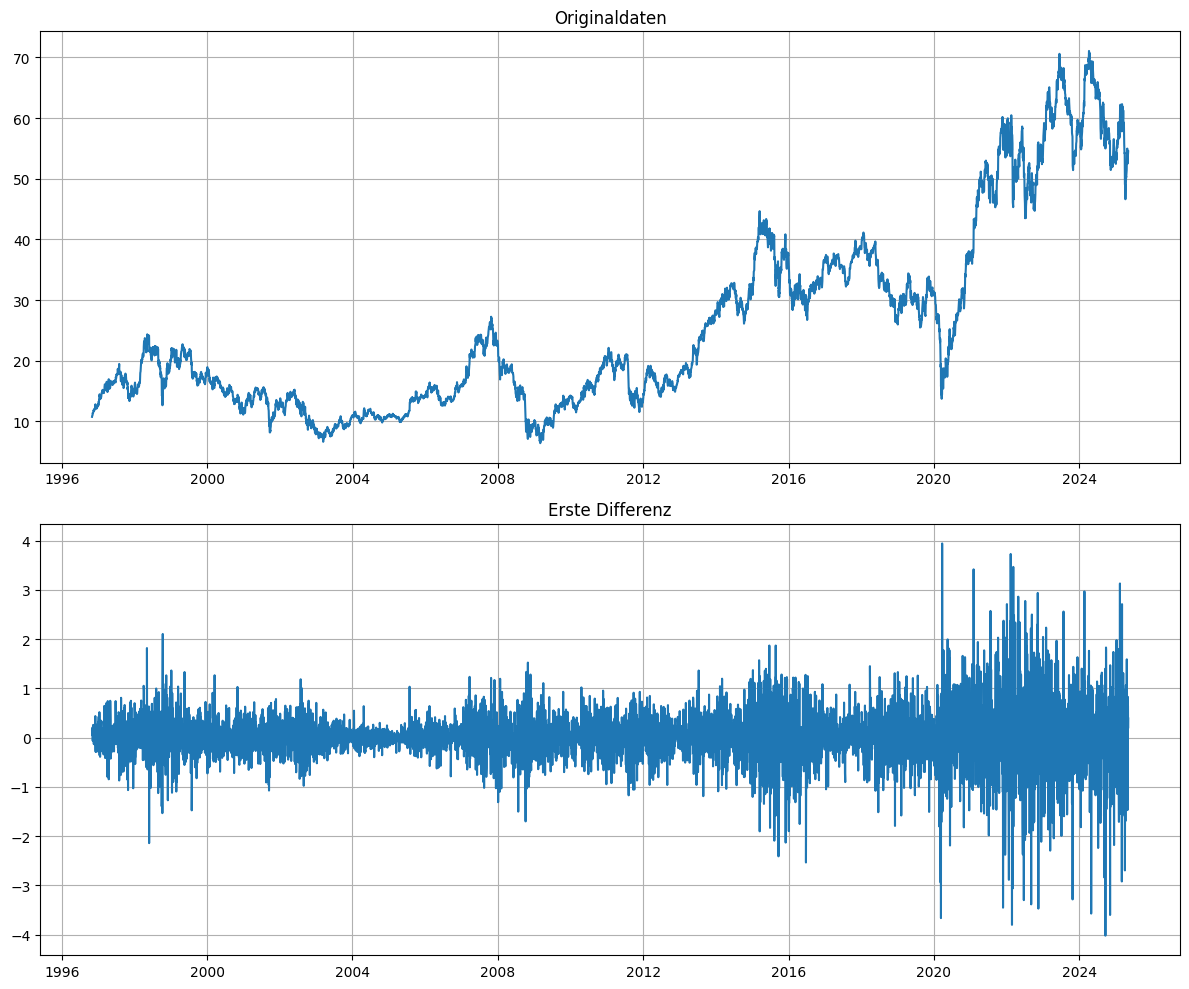

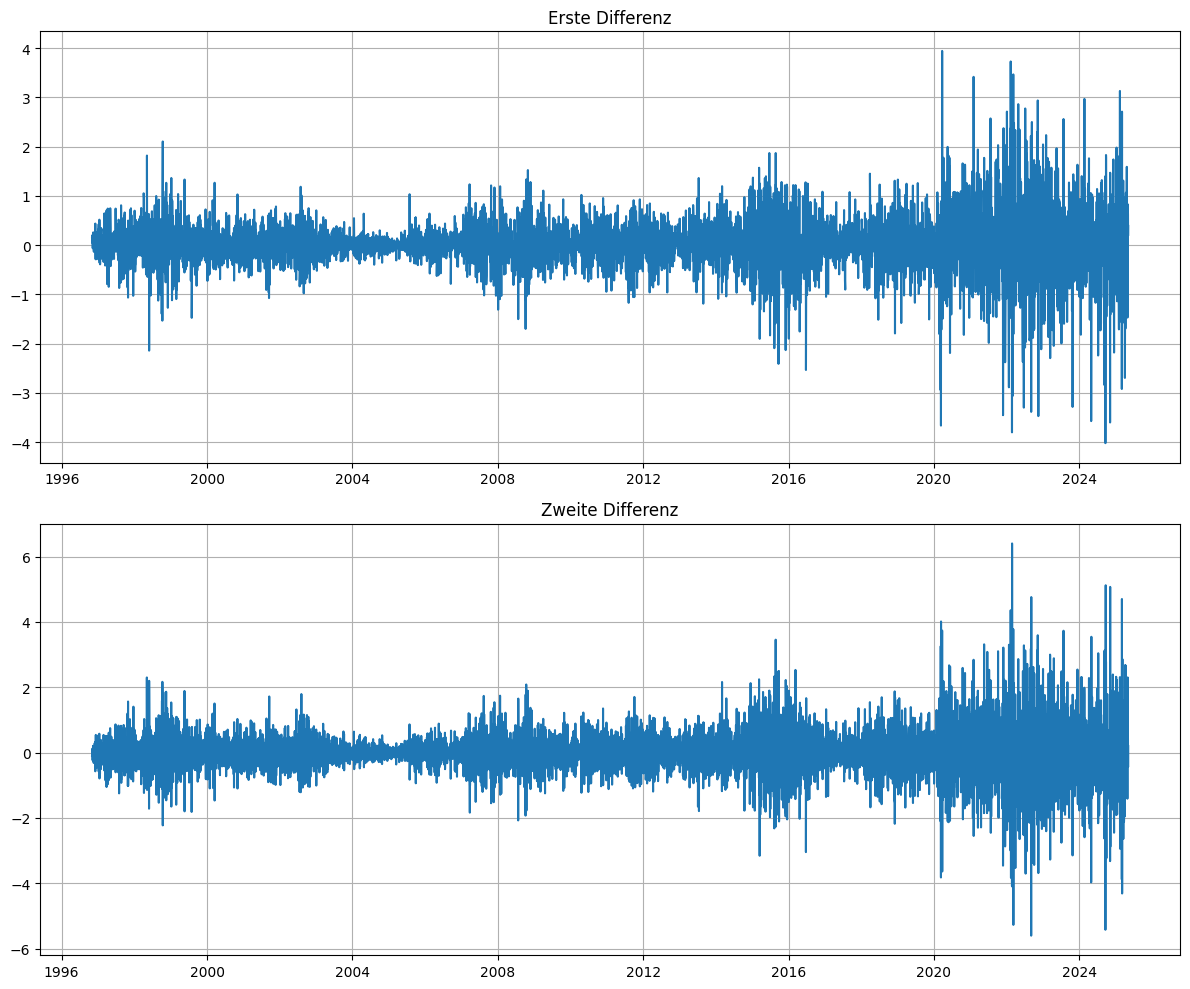

Originaldaten - Mittelwert: 25.6070, Varianz: 240.7105
Erste Differenz - Mittelwert: 0.0060, Varianz: 0.2752
Zweite Differenz - Mittelwert: 0.0000, Varianz: 0.5308


2. Logarithmische Transformation
-------------------------------


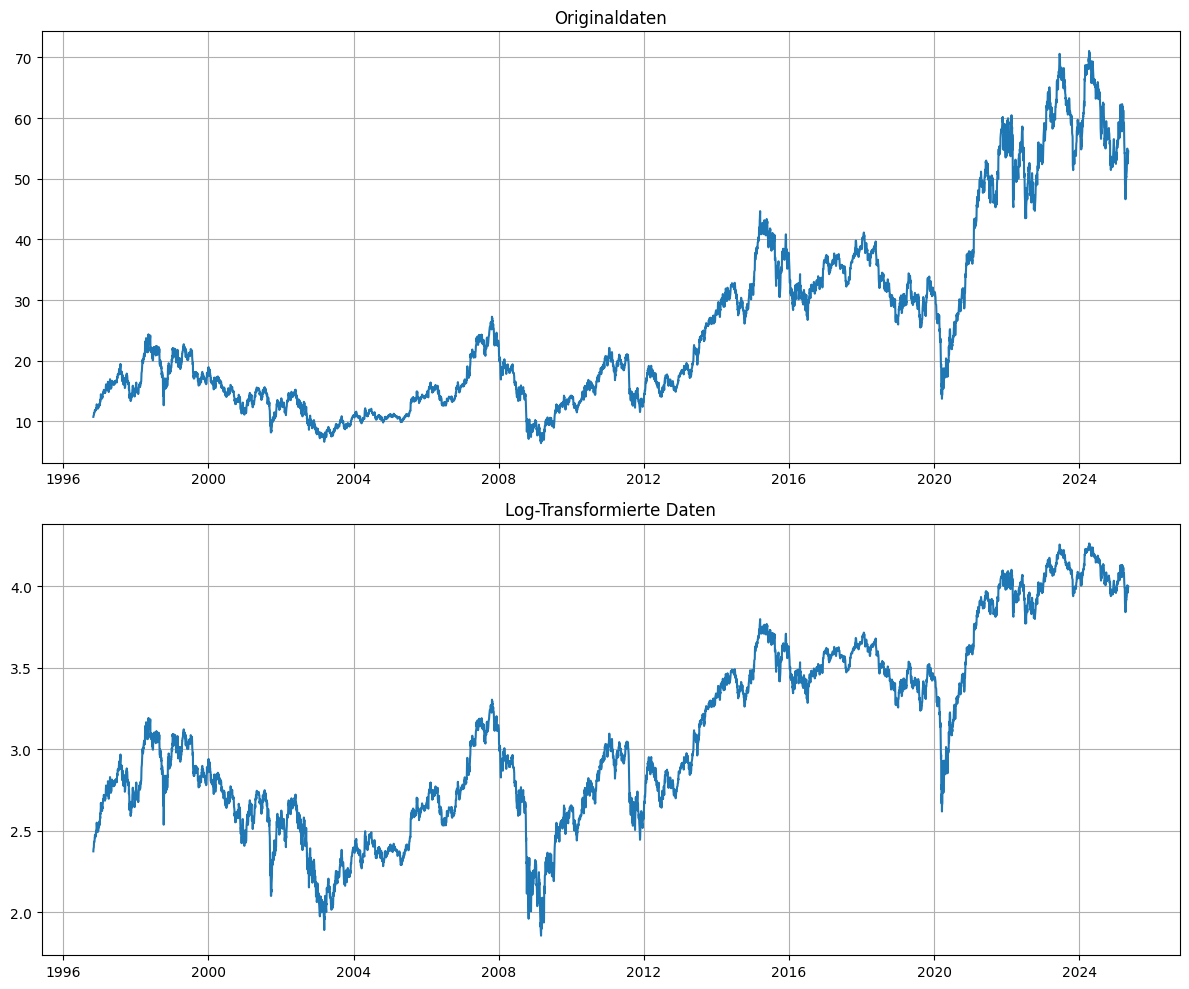

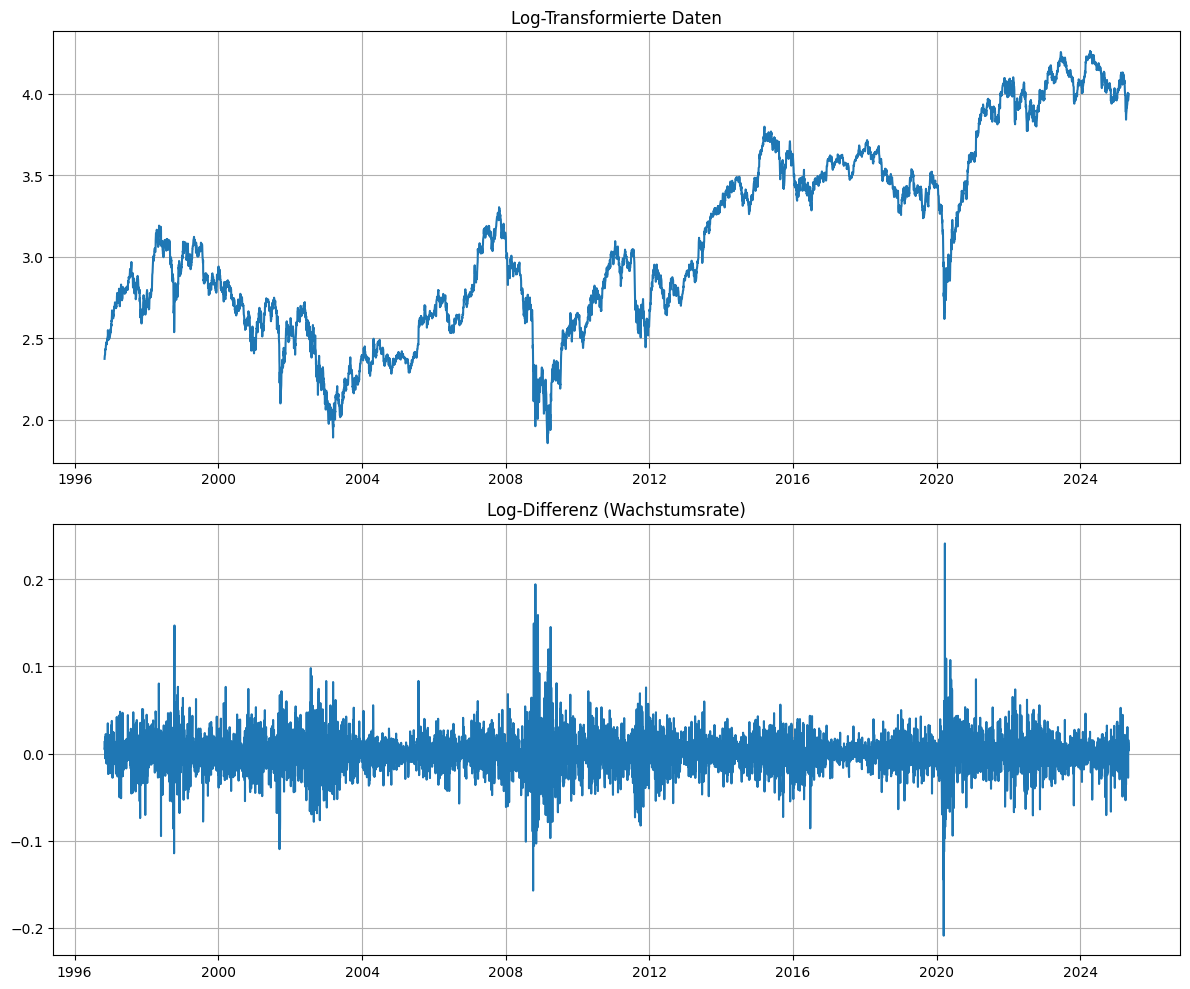

Log-Transformierte Daten - Mittelwert: 3.0762, Varianz: 0.3246
Log-Differenz - Mittelwert: 0.0002, Varianz: 0.0005


3. Moving Average (Gleitender Durchschnitt)
------------------------------------------


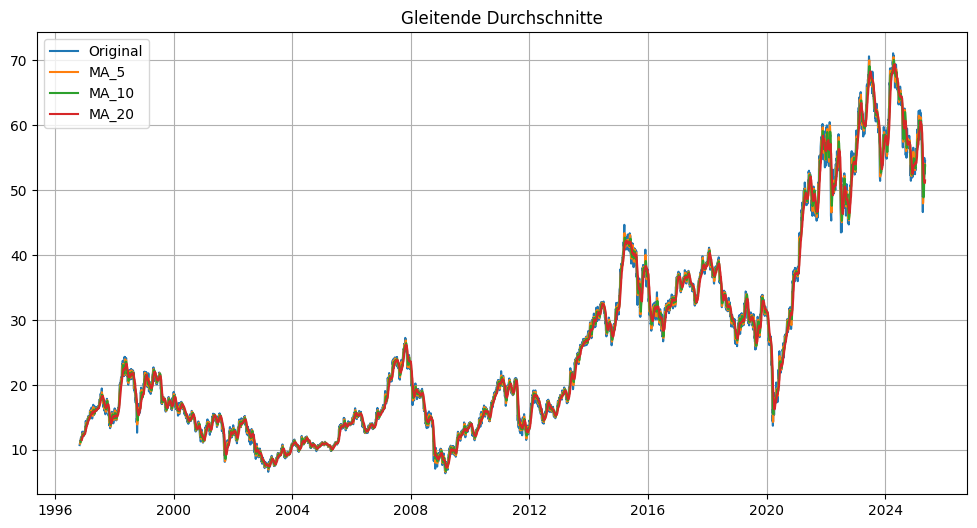

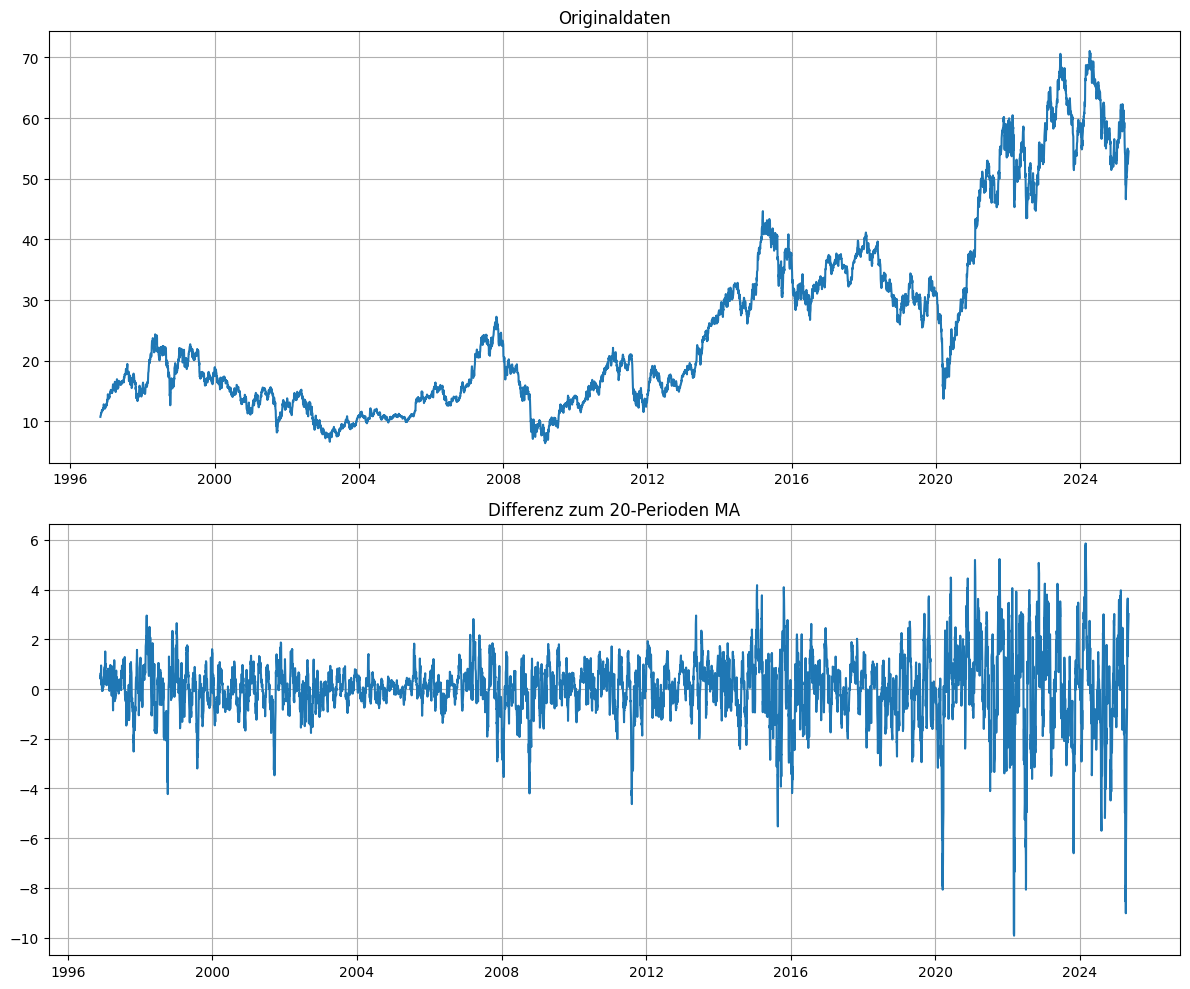

MA(20) - Mittelwert: 25.5901, Varianz: 239.1482
Differenz zum MA(20) - Mittelwert: 0.0538, Varianz: 1.7376


4. Simple Exponential Smoothing
------------------------------


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


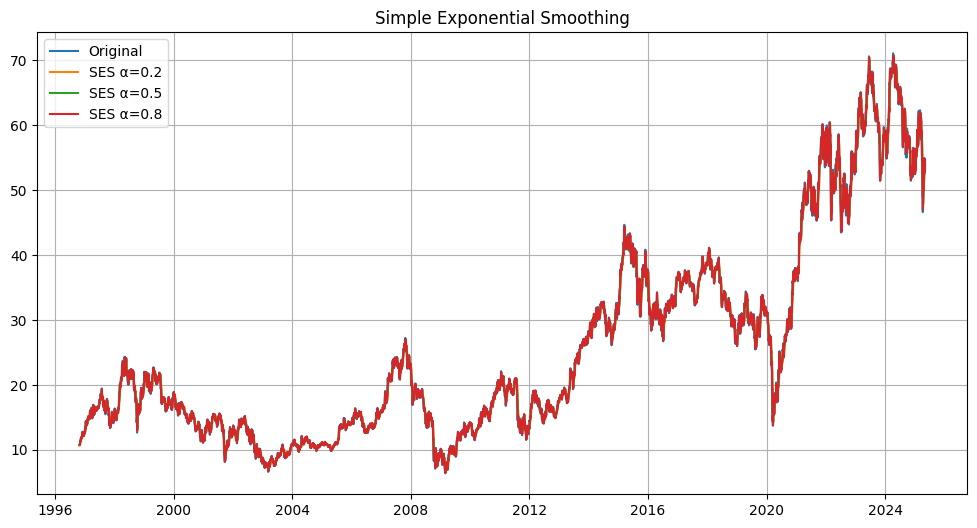

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


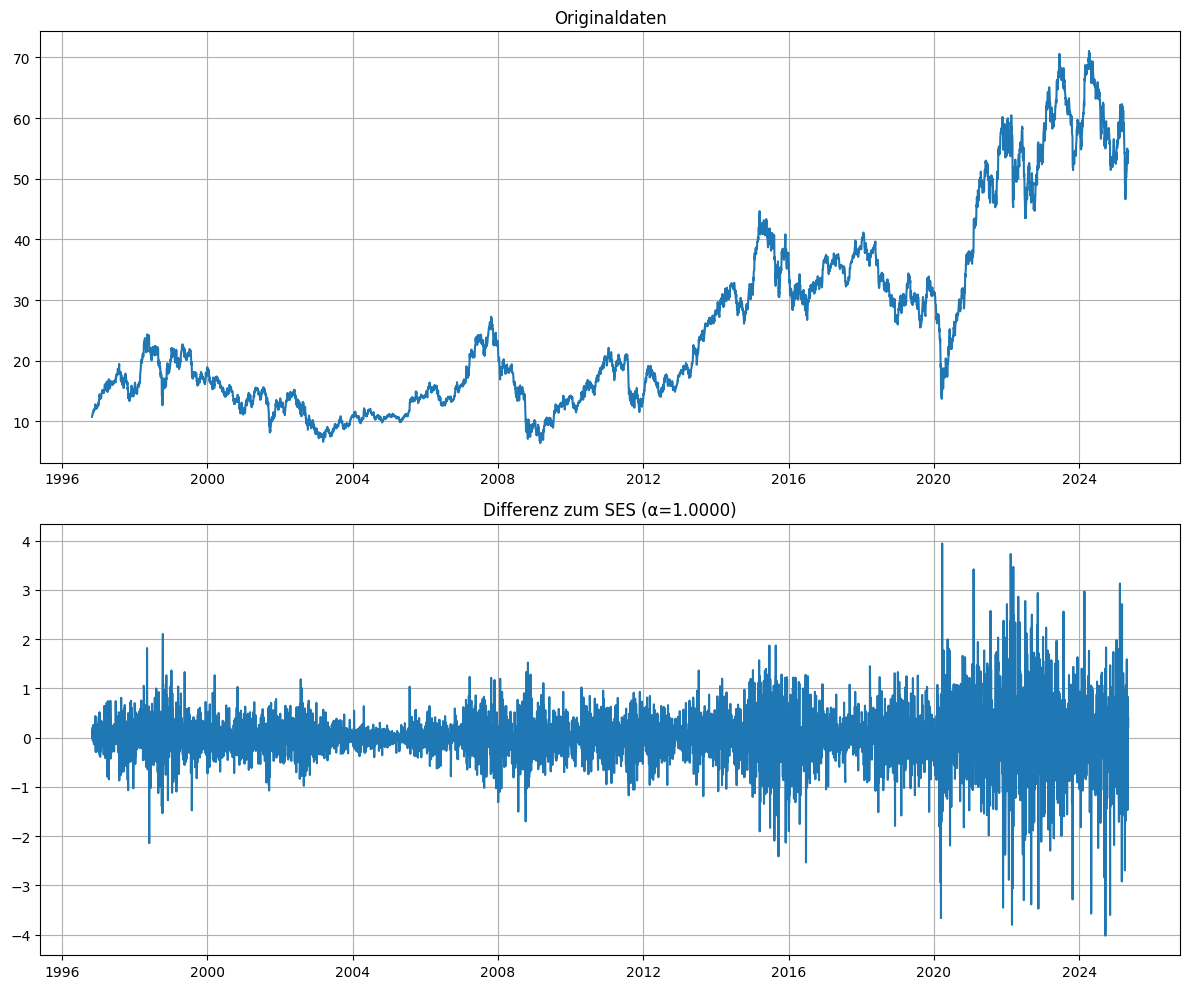

Optimaler Alpha-Wert: 1.0000
SES (α=1.0000) - Mittelwert: 25.6011, Varianz: 240.6264
Differenz zum SES - Mittelwert: 0.0060, Varianz: 0.2751


5. HP-Filter (Hodrick-Prescott-Filter)
------------------------------------


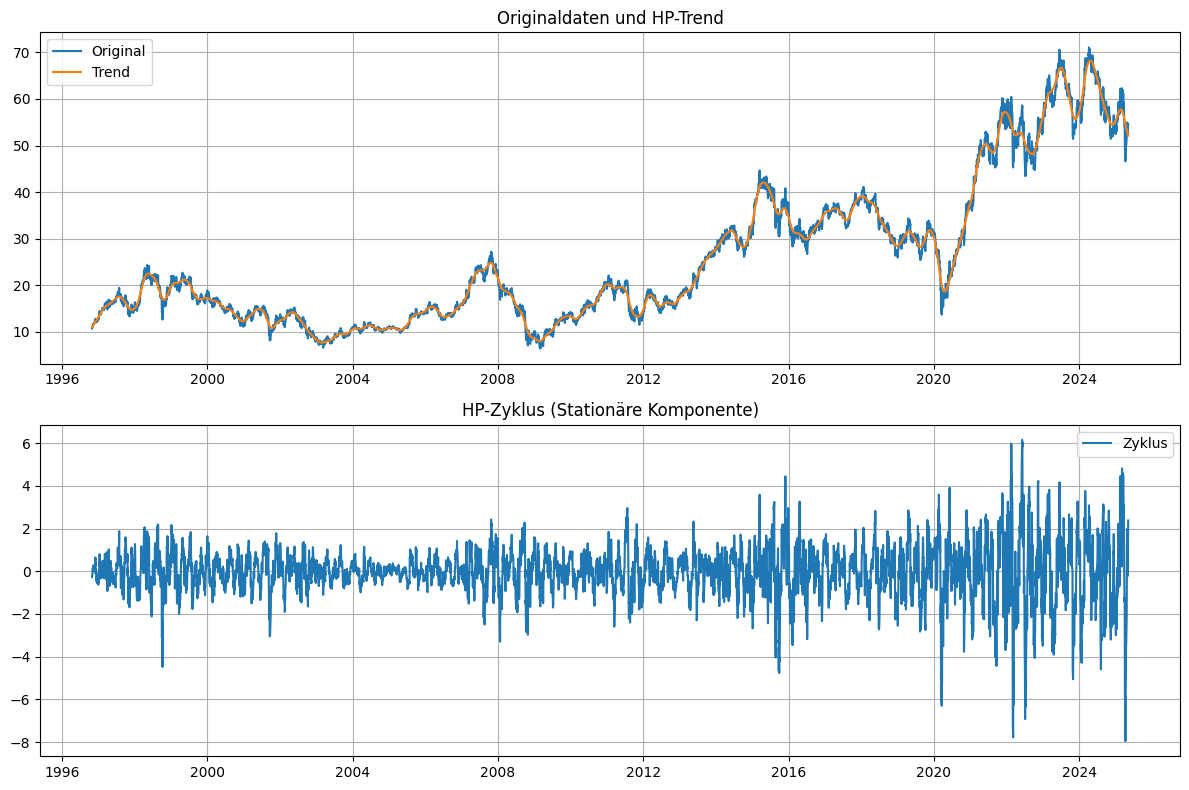

HP-Trend - Mittelwert: 25.6070, Varianz: 238.3845
HP-Zyklus - Mittelwert: 0.0000, Varianz: 1.4072


6. Zusammenfassung und Empfehlung
-------------------------------
Nach Analyse der verschiedenen Transformationsmethoden empfehlen wir folgende Transformation:
(Dieses Fazit muss basierend auf den tatsächlichen Ergebnissen angepasst werden)

Basierend auf den visuellen Inspektionen und den Eigenschaften der transformierten Zeitreihen:

1. Die erste Differenz zeigt deutlich verbesserte Stationaritätseigenschaften.
2. Die logarithmische Differenztransformation stabilisiert zusätzlich die Varianz.

Für den ARIMA(p,d,q)-Prozess empfehlen wir daher d=1, 
mit optionaler vorheriger Log-Transformation für gleichmäßigere Varianz.



In [ ]:
########################################################
#-----------------------   2.   -----------------------#
#---------- Transformation zur Stationarität ----------#
########################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import statsmodels.api as sm

# Wir arbeiten mit der 'Close'-Spalte
ts = data_MBG_DE['Close']

# Erstelle eine Funktion zur Visualisierung der Zeitreihen
def plot_timeseries(original_series, transformed_series, title_original="Originaldaten", 
                   title_transformed="Transformierte Daten"):
    """
    Funktion zur Visualisierung der Originaldaten und der transformierten Daten
    """
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Originaldaten plotten
    axes[0].plot(original_series)
    axes[0].set_title(title_original)
    axes[0].grid(True)
    
    # Transformierte Daten plotten
    axes[1].plot(transformed_series)
    axes[1].set_title(title_transformed)
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# 1. Differenzierung
print("1. Differenzierung")
print("-----------------")

# Erste Differenz
ts_diff1 = ts.diff().dropna()
plot_timeseries(ts, ts_diff1, "Originaldaten", "Erste Differenz")

# Zweite Differenz
ts_diff2 = ts_diff1.diff().dropna()
plot_timeseries(ts_diff1, ts_diff2, "Erste Differenz", "Zweite Differenz")

# Statistiken anzeigen
print(f"Originaldaten - Mittelwert: {ts.mean():.4f}, Varianz: {ts.var():.4f}")
print(f"Erste Differenz - Mittelwert: {ts_diff1.mean():.4f}, Varianz: {ts_diff1.var():.4f}")
print(f"Zweite Differenz - Mittelwert: {ts_diff2.mean():.4f}, Varianz: {ts_diff2.var():.4f}")
print("\n")

# 2. Logarithmische Transformation
print("2. Logarithmische Transformation")
print("-------------------------------")

# Log-Transformation (um negative Werte zu vermeiden, prüfen wir zuerst auf > 0)
if all(ts > 0):
    ts_log = np.log(ts)
    plot_timeseries(ts, ts_log, "Originaldaten", "Log-Transformierte Daten")
    
    # Log-Differenz (Wachstumsrate)
    ts_log_diff = ts_log.diff().dropna()
    plot_timeseries(ts_log, ts_log_diff, "Log-Transformierte Daten", "Log-Differenz (Wachstumsrate)")
    
    print(f"Log-Transformierte Daten - Mittelwert: {ts_log.mean():.4f}, Varianz: {ts_log.var():.4f}")
    print(f"Log-Differenz - Mittelwert: {ts_log_diff.mean():.4f}, Varianz: {ts_log_diff.var():.4f}")
else:
    print("Log-Transformation nicht möglich, da negative oder Null-Werte in der Zeitreihe vorhanden sind.")
print("\n")

# 3. Moving Average
print("3. Moving Average (Gleitender Durchschnitt)")
print("------------------------------------------")

# Funktionen für verschiedene Fensterlängen
def calculate_moving_averages(series, windows=[5, 10, 20]):
    """
    Berechnet den gleitenden Durchschnitt für verschiedene Fensterlängen
    """
    ma_dict = {}
    for window in windows:
        ma_dict[f'MA_{window}'] = series.rolling(window=window).mean()
    return ma_dict

# Gleitende Durchschnitte berechnen
ma_dict = calculate_moving_averages(ts)

# Plotten
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original')
for key, ma in ma_dict.items():
    plt.plot(ma, label=key)
plt.title('Gleitende Durchschnitte')
plt.legend()
plt.grid(True)
plt.show()

# Differenz zwischen Originaldaten und gleitendem Durchschnitt
window = 20  # Wähle eine geeignete Fensterlänge
ma = ts.rolling(window=window).mean()
ma_diff = ts - ma
ma_diff = ma_diff.dropna()

plot_timeseries(ts, ma_diff, "Originaldaten", f"Differenz zum {window}-Perioden MA")

print(f"MA({window}) - Mittelwert: {ma.dropna().mean():.4f}, Varianz: {ma.dropna().var():.4f}")
print(f"Differenz zum MA({window}) - Mittelwert: {ma_diff.mean():.4f}, Varianz: {ma_diff.var():.4f}")
print("\n")

# 4. Simple Exponential Smoothing
print("4. Simple Exponential Smoothing")
print("------------------------------")

# Verschiedene Alpha-Werte testen
alphas = [0.2, 0.5, 0.8]
ses_dict = {}

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original')

for alpha in alphas:
    # Exponential Smoothing Modell erstellen und fitten
    model = SimpleExpSmoothing(ts).fit(smoothing_level=alpha, optimized=False)
    ses_dict[f'SES_alpha_{alpha}'] = model.fittedvalues
    
    # Plotten
    plt.plot(model.fittedvalues, label=f'SES α={alpha}')

plt.title('Simple Exponential Smoothing')
plt.legend()
plt.grid(True)
plt.show()

# Differenz zwischen Originaldaten und SES mit optimalem Alpha
# Optimal Alpha durch Optimierung finden
optimal_model = SimpleExpSmoothing(ts).fit(optimized=True)
optimal_alpha = optimal_model.params['smoothing_level']
ses_optimal = optimal_model.fittedvalues
ses_diff = ts - ses_optimal

plot_timeseries(ts, ses_diff, "Originaldaten", f"Differenz zum SES (α={optimal_alpha:.4f})")

print(f"Optimaler Alpha-Wert: {optimal_alpha:.4f}")
print(f"SES (α={optimal_alpha:.4f}) - Mittelwert: {ses_optimal.mean():.4f}, Varianz: {ses_optimal.var():.4f}")
print(f"Differenz zum SES - Mittelwert: {ses_diff.mean():.4f}, Varianz: {ses_diff.var():.4f}")
print("\n")

# 5. HP-Filter
print("5. HP-Filter (Hodrick-Prescott-Filter)")
print("------------------------------------")

# Bestimme Lambda basierend auf der Frequenz der Daten
# Für tägliche Daten nehmen wir Lambda = 129600 (approximation)
# Für wöchentliche Daten: Lambda = 8192
# Für monatliche Daten: Lambda = 14400
# Für Quartalsdaten: Lambda = 1600
# Für jährliche Daten: Lambda = 6.25

# Prüfe die Frequenz deiner Daten
# Wir nehmen an, dass es sich um tägliche Daten handelt (Aktienkurse)
lambda_param = 129600

# HP-Filter anwenden
try:
    cycle, trend = hpfilter(ts, lamb=lambda_param)
    
    # Plotten
    plt.figure(figsize=(12, 8))
    
    plt.subplot(211)
    plt.plot(ts, label='Original')
    plt.plot(trend, label='Trend')
    plt.title('Originaldaten und HP-Trend')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(212)
    plt.plot(cycle, label='Zyklus')
    plt.title('HP-Zyklus (Stationäre Komponente)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"HP-Trend - Mittelwert: {trend.mean():.4f}, Varianz: {trend.var():.4f}")
    print(f"HP-Zyklus - Mittelwert: {cycle.mean():.4f}, Varianz: {cycle.var():.4f}")
except Exception as e:
    print(f"Fehler beim Anwenden des HP-Filters: {e}")
    print("Versuche einen alternativen Ansatz oder andere Lambda-Werte.")
print("\n")

# Zusammenfassung und Empfehlung
print("6. Zusammenfassung und Empfehlung")
print("-------------------------------")

# Basierend auf den Ergebnissen der Stationaritätstests aus dem vorherigen Schritt
# solltest du hier eine Entscheidung treffen, welche Transformation am besten geeignet ist

print("Nach Analyse der verschiedenen Transformationsmethoden empfehlen wir folgende Transformation:")
print("(Dieses Fazit muss basierend auf den tatsächlichen Ergebnissen angepasst werden)")

# Beispiel für ein Fazit (dies sollte basierend auf deinen Ergebnissen angepasst werden):
print("""
Basierend auf den visuellen Inspektionen und den Eigenschaften der transformierten Zeitreihen:

1. Die erste Differenz zeigt deutlich verbesserte Stationaritätseigenschaften.
2. Die logarithmische Differenztransformation stabilisiert zusätzlich die Varianz.

Für den ARIMA(p,d,q)-Prozess empfehlen wir daher d=1, 
mit optionaler vorheriger Log-Transformation für gleichmäßigere Varianz.
""")

---

## 3. ACF und PACF Analyse
### Autokorrelationsfunktion (ACF)
- Misst Korrelation zwischen $y_t$ und $y_{t-k}$ für verschiedene Lags k
- Kovarianzfunktion: $\gamma_y(h) = Cov(y_{t+h}, y_t) = E[(y_{t+h} - \mu_y)(y_t - \mu_y)]$
- ACF: $\rho(h) = \frac{\gamma_y(h)}{\gamma_y(0)}$
- Hilft bei Identifikation des MA-Teils (q)
- Interpretation: 
  - MA(q): ACF bricht nach Lag q ab
  - AR(p): ACF klingt langsam ab

### Partielle Autokorrelationsfunktion (PACF)
- Misst Korrelation zwischen $y_t$ und $y_{t-k}$ unter Berücksichtigung der Zwischenlags
- Hilft bei Identifikation des AR-Teils (p)
- Interpretation:
  - AR(p): PACF bricht nach Lag p ab
  - MA(q): PACF klingt langsam ab

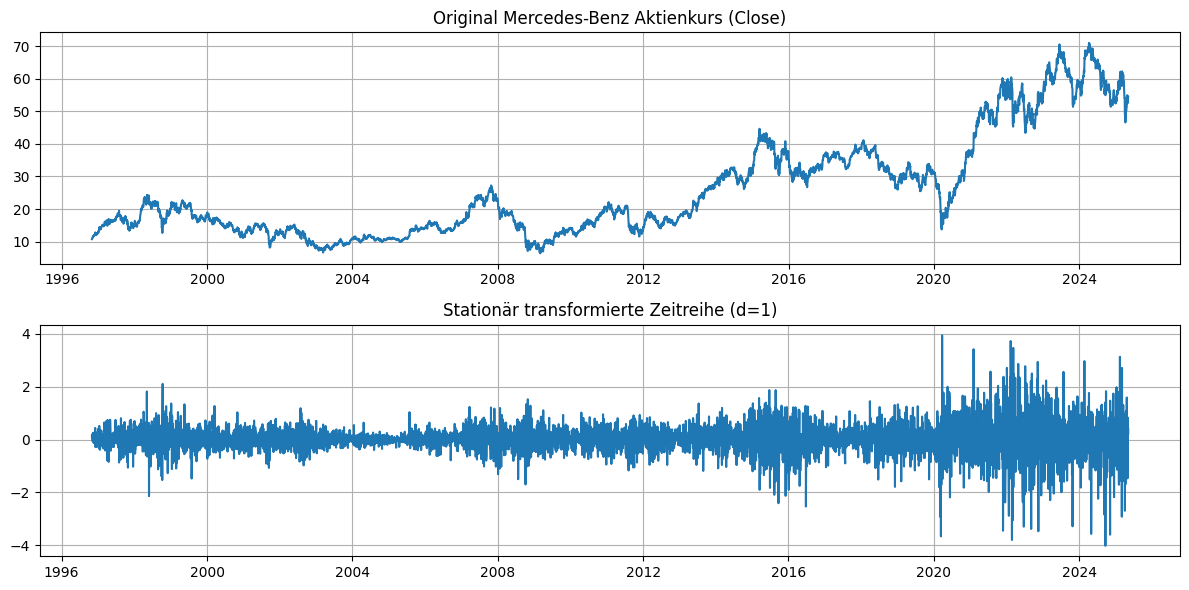

#-#-#-#-#-#-#-# ACF für stationäre Zeitreihe (d=1) #-#-#-#-#-#-#-#


<Figure size 1200x600 with 0 Axes>

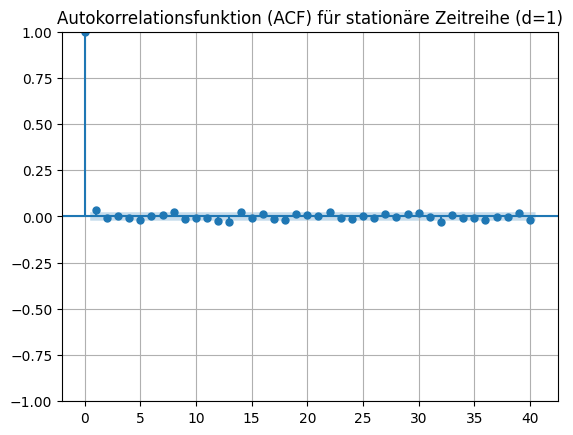

Signifikante ACF-Lags (95% Konfidenzintervall): [1, 8, 12, 13, 14, 32]
Die ACF zeigt viele signifikante Lags. Der Prozess könnte einen höheren Ordnung MA-Teil haben.
#-#-#-#-#-#-#-# PACF für stationäre Zeitreihe (d=1) #-#-#-#-#-#-#-#


<Figure size 1200x600 with 0 Axes>

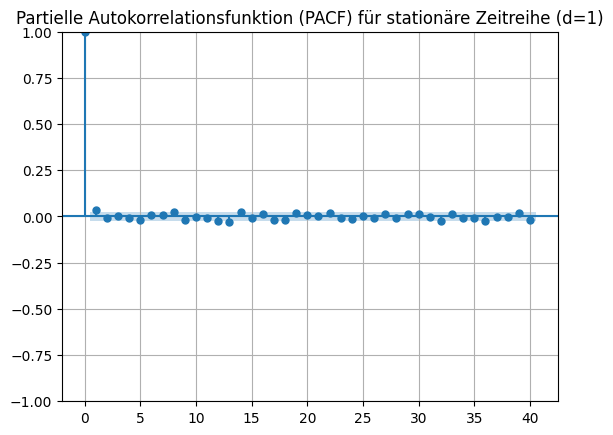

Signifikante PACF-Lags (95% Konfidenzintervall): [1, 8, 12, 13, 14, 32, 36]
Die PACF zeigt viele signifikante Lags. Der Prozess könnte einen höheren Ordnung AR-Teil haben.
#-#-#-#-#-#-#-# ACF für log-transformierte, stationäre Zeitreihe (d=1) #-#-#-#-#-#-#-#


<Figure size 1200x600 with 0 Axes>

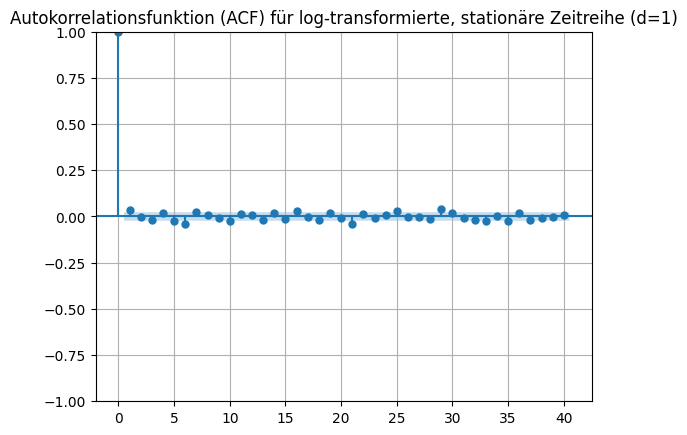

Signifikante ACF-Lags (95% Konfidenzintervall): [1, 5, 6, 7, 10, 16, 21, 25, 29, 33]
Die ACF zeigt viele signifikante Lags. Der Prozess könnte einen höheren Ordnung MA-Teil haben.
#-#-#-#-#-#-#-# PACF für log-transformierte, stationäre Zeitreihe (d=1) #-#-#-#-#-#-#-#


<Figure size 1200x600 with 0 Axes>

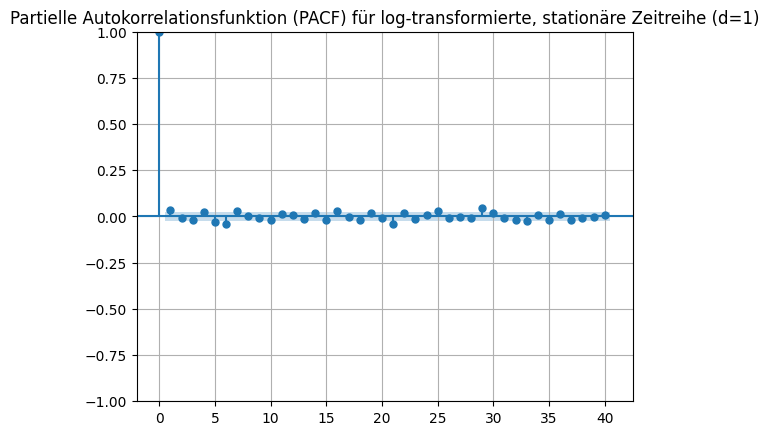

Signifikante PACF-Lags (95% Konfidenzintervall): [1, 5, 6, 7, 16, 21, 25, 29, 33]
Die PACF zeigt viele signifikante Lags. Der Prozess könnte einen höheren Ordnung AR-Teil haben.


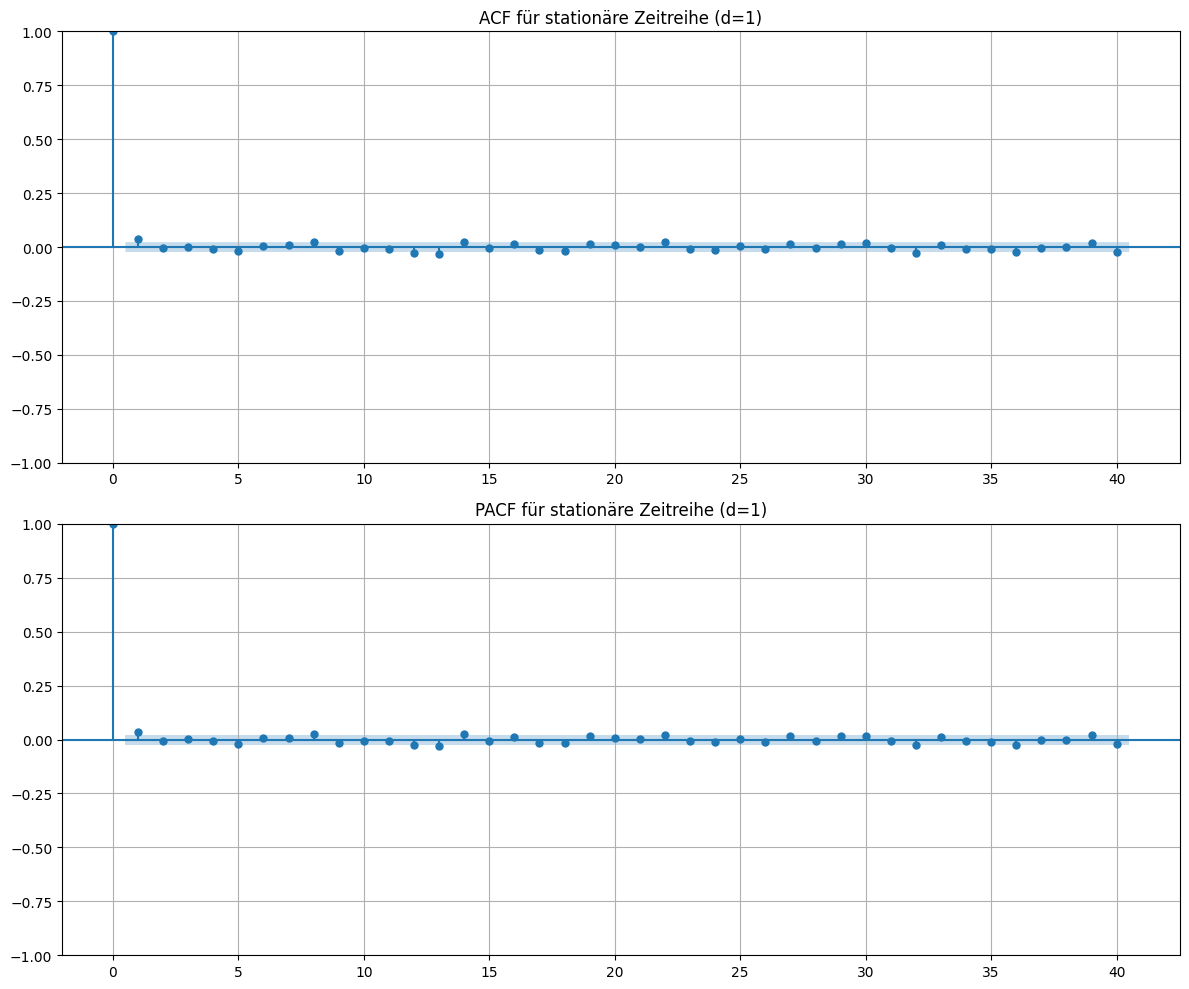

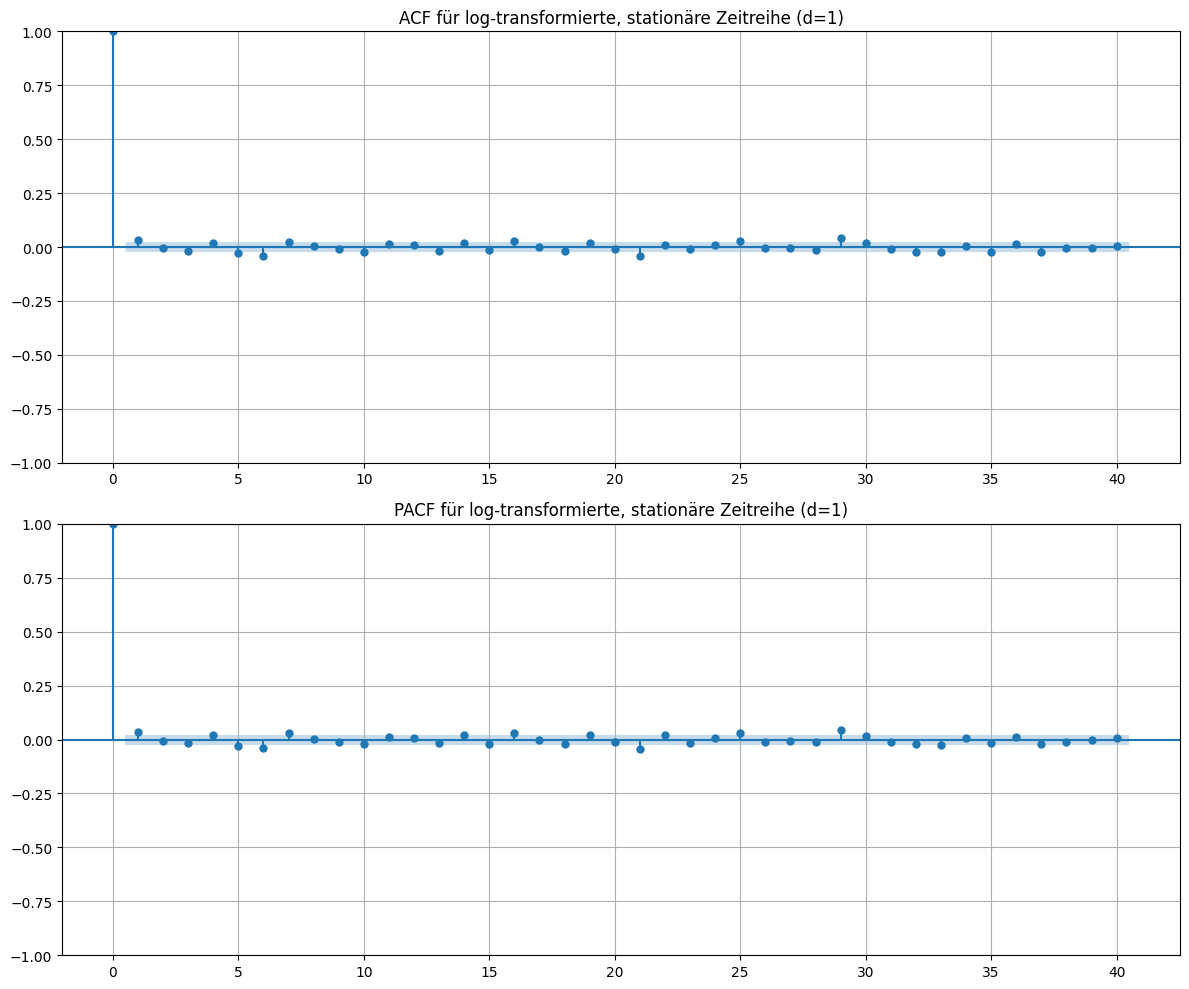


#-#-#-#-#-#-#-# Zusammenfassung der ACF und PACF Analyse #-#-#-#-#-#-#-#

Vorgeschlagene ARIMA-Modellparameter für stationäre Zeitreihe:
ARIMA(36, 1, 32)

Sowohl ACF als auch PACF klingen allmählich ab. Hinweis auf einen komplexeren ARMA-Prozess.


In [7]:
########################################################
#-----------------------   3.   -----------------------#
#---------------- ACF und PACF Analyse ----------------#
########################################################



#-#-#-#-#-#-#-#-#-#-#-# Librarys #-#-#-#-#-#-#-#-#-#-#-#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf


#------------------------------------------------------#
#-#-#-#-#-#-#-#-# Daten vorbereiten #-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#

# Wir arbeiten mit der 'Close'-Spalte
ts = data_MBG_DE['Close']

# Angenommen, wir haben bereits bestimmt, dass die Zeitreihe durch Differenzierung stationär wird
# Wir erstellen hier die stationäre Zeitreihe (passe d basierend auf deinen Ergebnissen an)
d = 1  # Integrationsordnung: d=1 für erste Differenz, d=2 für zweite Differenz

if d == 1:
    stationary_ts = ts.diff().dropna()
elif d == 2:
    stationary_ts = ts.diff().diff().dropna()
else:
    stationary_ts = ts  # Keine Differenzierung, falls d=0

# Optional: Wir können auch die logarithmisch transformierte, differenzierte Reihe betrachten
if all(ts > 0):
    log_ts = np.log(ts)
    if d == 1:
        log_diff_ts = log_ts.diff().dropna()
    elif d == 2:
        log_diff_ts = log_ts.diff().diff().dropna()
    else:
        log_diff_ts = log_ts  # Keine Differenzierung, falls d=0
else:
    print("Log-Transformation nicht möglich, da negative oder Null-Werte vorhanden sind.")
    log_diff_ts = None

#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-# Visualisierung #-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#
# Original und stationär transformierte Zeitreihe plotten
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(ts)
plt.title('Original Mercedes-Benz Aktienkurs (Close)')
plt.grid(True)

plt.subplot(212)
plt.plot(stationary_ts)
plt.title(f'Stationär transformierte Zeitreihe (d={d})')
plt.grid(True)

plt.tight_layout()
plt.show()

#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-#-#-# ACF #-#-#-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#

def analyze_acf(series, series_name, lags=40):
    """
    Berechnet und visualisiert die Autokorrelationsfunktion (ACF)
    
    Parameters:
    -----------
    series : pd.Series
        Die zu analysierende Zeitreihe
    series_name : str
        Name der Zeitreihe für den Plot-Titel
    lags : int
        Anzahl der Lags für die ACF
    """
    print(f"#-#-#-#-#-#-#-# ACF für {series_name} #-#-#-#-#-#-#-#")
    
    # ACF berechnen
    acf_values = acf(series, nlags=lags, fft=True)
    
    # ACF plotten
    plt.figure(figsize=(12, 6))
    plot_acf(series, lags=lags, title=f'Autokorrelationsfunktion (ACF) für {series_name}')
    plt.grid(True)
    plt.show()
    
    # Signifikante Lags identifizieren (95% Konfidenzintervall)
    confidence_interval = 1.96 / np.sqrt(len(series))
    significant_lags = [i for i, value in enumerate(acf_values) if abs(value) > confidence_interval and i > 0]
    
    print(f"Signifikante ACF-Lags (95% Konfidenzintervall): {significant_lags}")
    
    # Identifikation des MA-Teils (q)
    # ACF bricht typischerweise nach Lag q bei einem MA(q) Prozess ab
    if len(significant_lags) > 0 and max(significant_lags) < 10:
        suggested_q = max(significant_lags)
        print(f"Basierend auf der ACF könnte q={suggested_q} ein angemessener Wert für den MA-Teil sein.")
    elif len(significant_lags) == 0:
        print("Die ACF zeigt keine signifikanten Lags. Der Prozess könnte reines weißes Rauschen sein (q=0).")
    else:
        print("Die ACF zeigt viele signifikante Lags. Der Prozess könnte einen höheren Ordnung MA-Teil haben.")
    
    return acf_values, significant_lags

#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-#-#-# PACF #-#-#-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#

def analyze_pacf(series, series_name, lags=40):
    """
    Berechnet und visualisiert die Partielle Autokorrelationsfunktion (PACF)
    
    Parameters:
    -----------
    series : pd.Series
        Die zu analysierende Zeitreihe
    series_name : str
        Name der Zeitreihe für den Plot-Titel
    lags : int
        Anzahl der Lags für die PACF
    """
    print(f"#-#-#-#-#-#-#-# PACF für {series_name} #-#-#-#-#-#-#-#")
    
    # PACF berechnen
    pacf_values = pacf(series, nlags=lags, method='ols')
    
    # PACF plotten
    plt.figure(figsize=(12, 6))
    plot_pacf(series, lags=lags, method='ols', title=f'Partielle Autokorrelationsfunktion (PACF) für {series_name}')
    plt.grid(True)
    plt.show()
    
    # Signifikante Lags identifizieren (95% Konfidenzintervall)
    confidence_interval = 1.96 / np.sqrt(len(series))
    significant_lags = [i for i, value in enumerate(pacf_values) if abs(value) > confidence_interval and i > 0]
    
    print(f"Signifikante PACF-Lags (95% Konfidenzintervall): {significant_lags}")
    
    # Identifikation des AR-Teils (p)
    # PACF bricht typischerweise nach Lag p bei einem AR(p) Prozess ab
    if len(significant_lags) > 0 and max(significant_lags) < 10:
        suggested_p = max(significant_lags)
        print(f"Basierend auf der PACF könnte p={suggested_p} ein angemessener Wert für den AR-Teil sein.")
    elif len(significant_lags) == 0:
        print("Die PACF zeigt keine signifikanten Lags. Der Prozess könnte einen MA-Prozess sein (p=0).")
    else:
        print("Die PACF zeigt viele signifikante Lags. Der Prozess könnte einen höheren Ordnung AR-Teil haben.")
    
    return pacf_values, significant_lags

#------------------------------------------------------#
#-#-#-#-#-#-#-# ACF und PACF Analyse #-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#

# ACF und PACF für die stationäre Zeitreihe analysieren
acf_values, acf_significant_lags = analyze_acf(stationary_ts, f'stationäre Zeitreihe (d={d})')
pacf_values, pacf_significant_lags = analyze_pacf(stationary_ts, f'stationäre Zeitreihe (d={d})')

# Optional: ACF und PACF für die logarithmisch transformierte, stationäre Zeitreihe analysieren
if log_diff_ts is not None:
    acf_log_values, acf_log_significant_lags = analyze_acf(log_diff_ts, f'log-transformierte, stationäre Zeitreihe (d={d})')
    pacf_log_values, pacf_log_significant_lags = analyze_pacf(log_diff_ts, f'log-transformierte, stationäre Zeitreihe (d={d})')

#------------------------------------------------------#
#-#-#-#-#-# Kombinierte Darstellung ACF/PACF #-#-#-#-#-#
#------------------------------------------------------#

# ACF und PACF in einem Plot für besseren Vergleich
plt.figure(figsize=(12, 10))

plt.subplot(211)
plot_acf(stationary_ts, lags=40, ax=plt.gca(), title=f'ACF für stationäre Zeitreihe (d={d})')
plt.grid(True)

plt.subplot(212)
plot_pacf(stationary_ts, lags=40, method='ols', ax=plt.gca(), title=f'PACF für stationäre Zeitreihe (d={d})')
plt.grid(True)

plt.tight_layout()
plt.show()

# Optional: Kombinierte Darstellung für logarithmisch transformierte Zeitreihe
if log_diff_ts is not None:
    plt.figure(figsize=(12, 10))
    
    plt.subplot(211)
    plot_acf(log_diff_ts, lags=40, ax=plt.gca(), title=f'ACF für log-transformierte, stationäre Zeitreihe (d={d})')
    plt.grid(True)
    
    plt.subplot(212)
    plot_pacf(log_diff_ts, lags=40, method='ols', ax=plt.gca(), title=f'PACF für log-transformierte, stationäre Zeitreihe (d={d})')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

#------------------------------------------------------#
#-#-#-#-#-#-#-#-# Zusammenfassung #-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#

print("\n#-#-#-#-#-#-#-# Zusammenfassung der ACF und PACF Analyse #-#-#-#-#-#-#-#")

# Vorschläge für p und q basierend auf ACF und PACF
suggested_p = max(pacf_significant_lags) if len(pacf_significant_lags) > 0 else 0
suggested_q = max(acf_significant_lags) if len(acf_significant_lags) > 0 else 0

print(f"\nVorgeschlagene ARIMA-Modellparameter für stationäre Zeitreihe:")
print(f"ARIMA({suggested_p}, {d}, {suggested_q})")

# Muster erkennen
if len(acf_significant_lags) == 0 and len(pacf_significant_lags) == 0:
    print("\nWeder ACF noch PACF zeigen signifikante Lags. Die Zeitreihe verhält sich möglicherweise wie weißes Rauschen.")
elif len(acf_significant_lags) > 0 and len(pacf_significant_lags) == 0:
    print("\nACF klingt allmählich ab, PACF bricht ab. Hinweis auf einen MA-Prozess.")
elif len(acf_significant_lags) == 0 and len(pacf_significant_lags) > 0:
    print("\nACF bricht ab, PACF klingt allmählich ab. Hinweis auf einen AR-Prozess.")
elif max(acf_significant_lags) < 10 and max(pacf_significant_lags) < 10:
    print("\nSowohl ACF als auch PACF brechen ab. Hinweis auf einen ARMA-Prozess.")
else:
    print("\nSowohl ACF als auch PACF klingen allmählich ab. Hinweis auf einen komplexeren ARMA-Prozess.")

---

## 4. Modellspezifikation
### AR-Modelle (Autoregressive)
- AR(p): $y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \varepsilon_t$
- Stationaritätsbedingung für AR(1): $|\phi| < 1$
- Stationaritätsbedingung für AR(2): Charakteristische Wurzeln des Lag-Polynoms $1 - \alpha_1 L - \alpha_2 L^2$ außerhalb des Einheitskreises
- Erwartungswert für AR(1): $E[Y_t] = 0$ bzw. $\frac{c}{1-\phi}$ (falls c vorhanden)
- Varianz für AR(1): $\gamma(0) = \frac{\sigma_{\varepsilon}^2}{1-\phi^2}$
- j-te Kovarianz für AR(1): $\gamma_y(j) = \phi^j\gamma_y(0) = \phi^j\frac{\sigma_{\varepsilon}^2}{1-\phi^2}$

### MA-Modelle (Moving Average)
- MA(q): $y_t = c + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + ... + \theta_q \varepsilon_{t-q}$
- Erwartungswert: $E[y_t] = c$
- Varianz: $\gamma_y(0) = (1 + \theta_1^2 + \theta_2^2 + ... + \theta_q^2)\sigma_{\varepsilon}^2$
- Autokovarianzen: 
  $\gamma_y(j) = \begin{cases} 
  (\theta_j + \theta_{j-1}\theta_1 + \theta_{j-2}\theta_2 + ... + \theta_0\theta_j)\sigma_{\varepsilon}^2 & \text{für } j = 1,2,...,q \\ 
  0 & \text{für } j > q 
  \end{cases}$

### ARMA-Modelle
- ARMA(p,q): $y_t = c + \phi_1 y_{t-1} + ... + \phi_p y_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + ... + \theta_q \varepsilon_{t-q}$
- Interpretation: sowohl ACF als auch PACF klingen langsam ab

### ARIMA-Modelle
- ARIMA(p,d,q): Integrierter ARMA-Prozess
- p: Ordnung des AR-Teils
- d: Differenzierungsgrad
- q: Ordnung des MA-Teils
- Definition I(d) Prozess: $\{y_t\}$ ist I(d), wenn seine d-te Differenz ein strikt stationärer Prozess, I(0), ist

Trainingsdaten: 5844 Beobachtungen
Testdaten: 1462 Beobachtungen


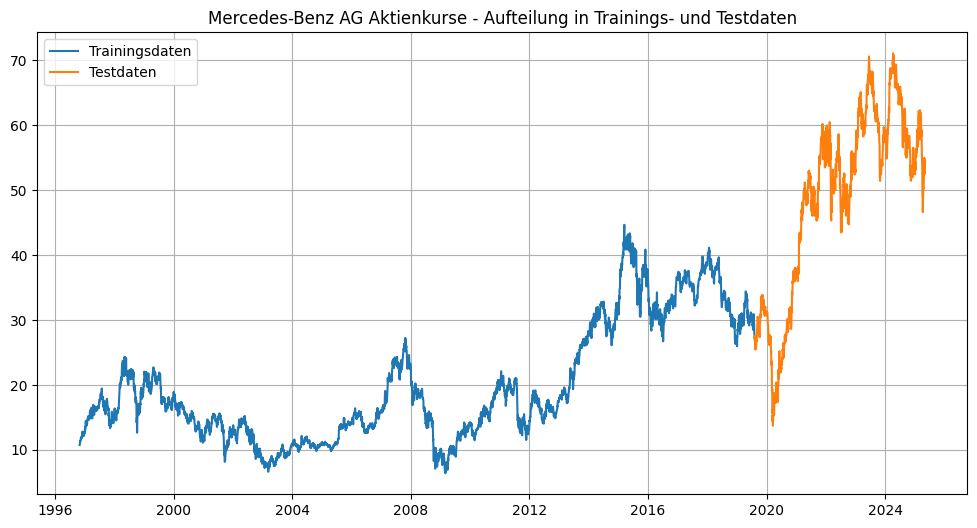

#-#-#-#-#-#-#-# Schätzung AR(1) Modell #-#-#-#-#-#-#-#
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 5843
Model:                     AutoReg(1)   Log Likelihood               -2586.502
Method:               Conditional MLE   S.D. of innovations              0.377
Date:                Sun, 11 May 2025   AIC                           5179.004
Time:                        22:41:05   BIC                           5199.023
Sample:                             1   HQIC                          5185.966
                                 5843                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.005      0.535      0.592      -0.007       0.012
Close.L1       0.0528      0.013      4.038      0.000       0.027       0.0

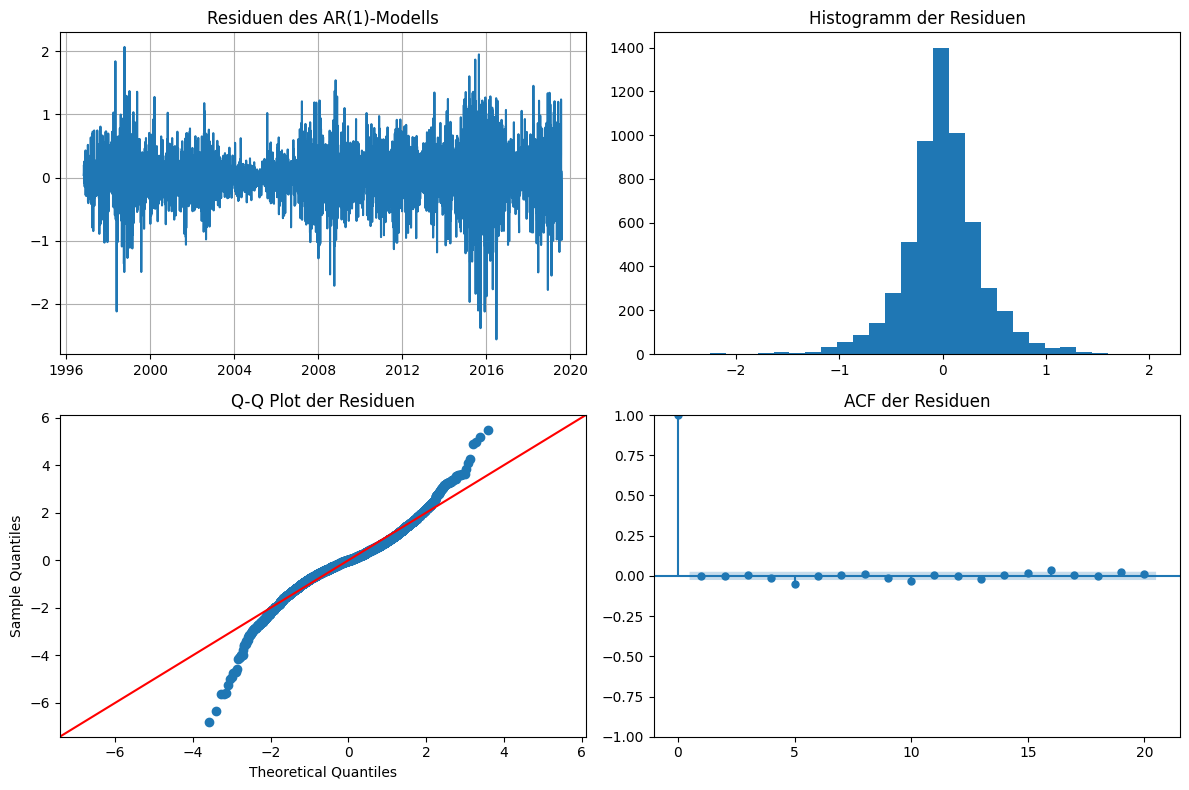

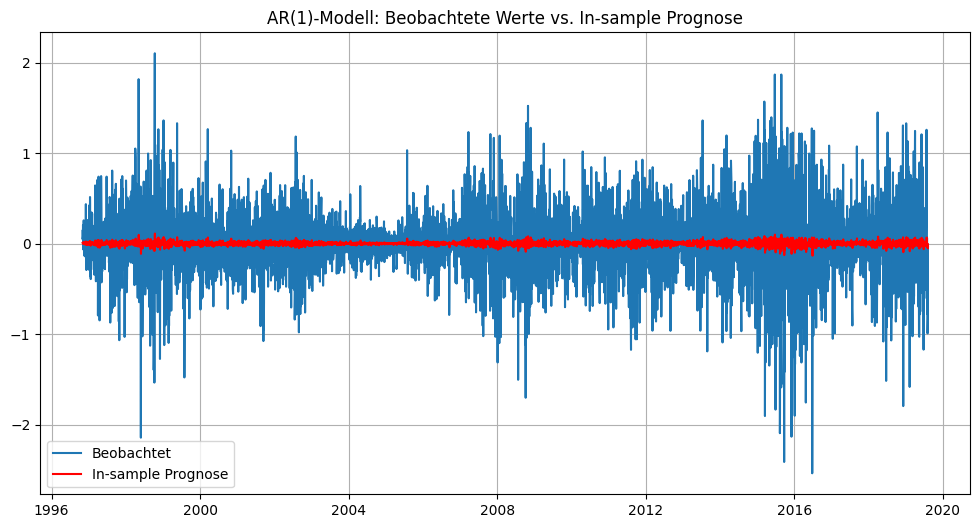

Akaike Information Criterion (AIC): 5179.0044
Bayesian Information Criterion (BIC): 5199.0229
#-#-#-#-#-#-#-# Schätzung MA(1) Modell #-#-#-#-#-#-#-#
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5843
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2586.570
Date:                Sun, 11 May 2025   AIC                           5179.141
Time:                        22:41:07   BIC                           5199.160
Sample:                             0   HQIC                          5186.102
                               - 5843                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.005      0.539      0.590      -

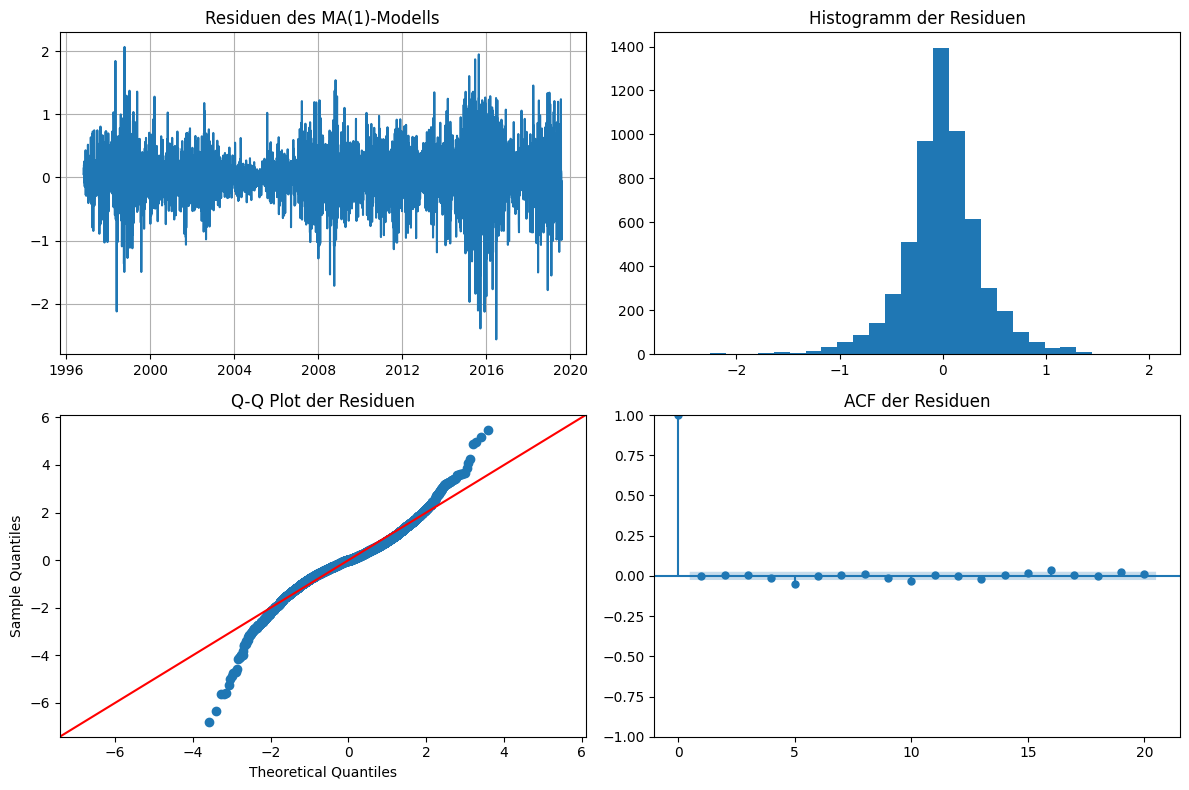

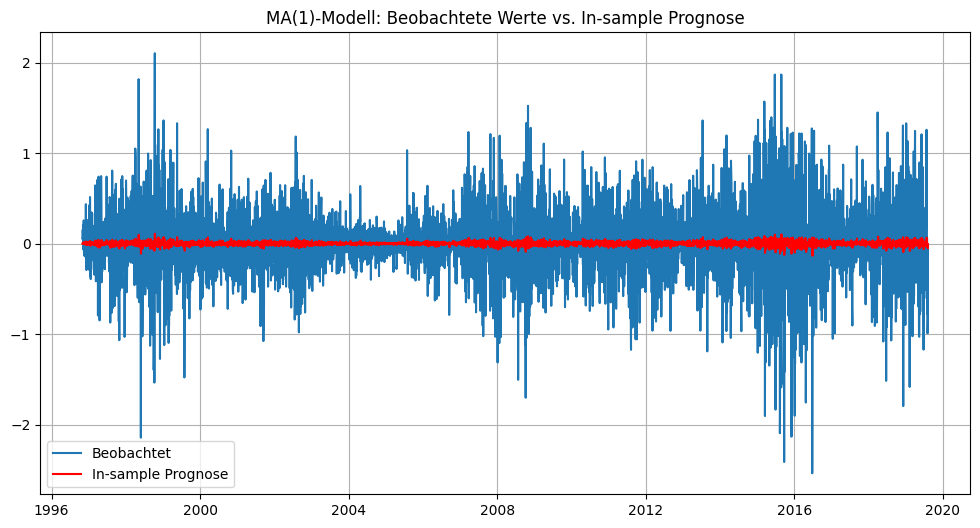

Akaike Information Criterion (AIC): 5179.1408
Bayesian Information Criterion (BIC): 5199.1598
#-#-#-#-#-#-#-# Schätzung ARMA(1,1) Modell #-#-#-#-#-#-#-#
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5843
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2586.499
Date:                Sun, 11 May 2025   AIC                           5180.999
Time:                        22:41:07   BIC                           5207.691
Sample:                             0   HQIC                          5190.280
                               - 5843                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.005      0.533      0.594   

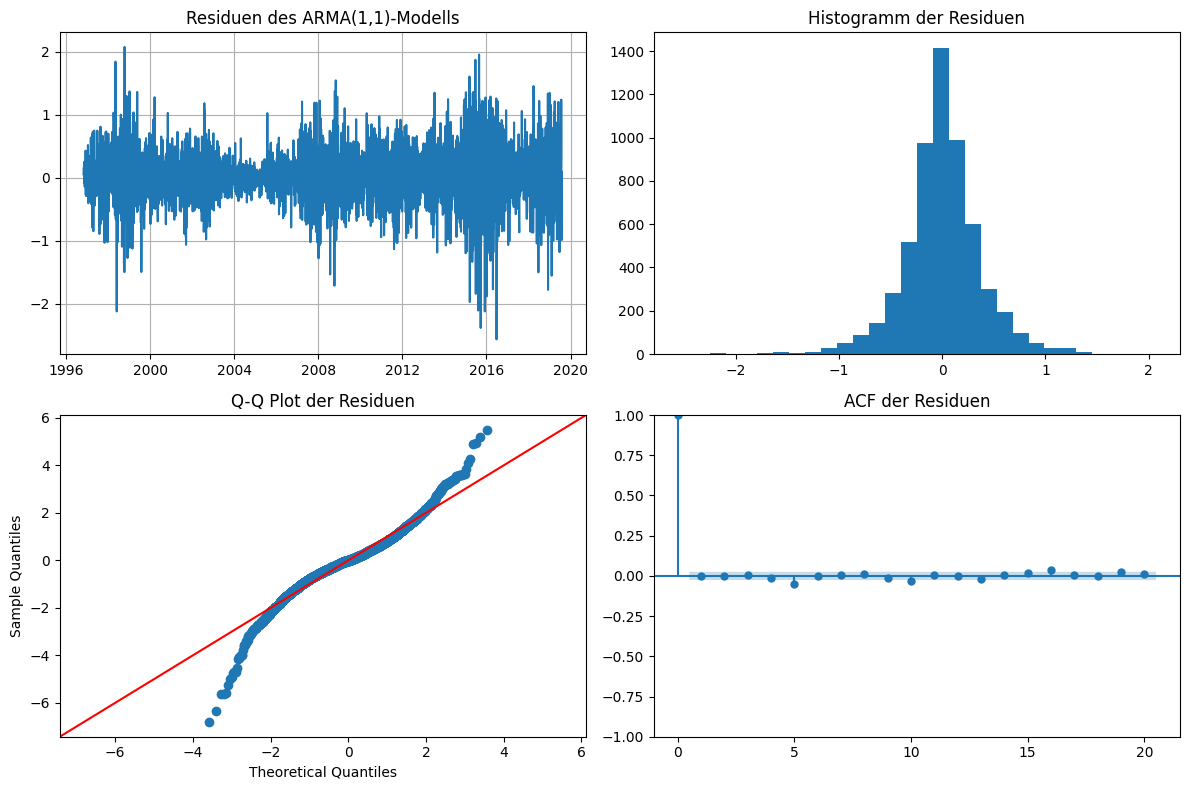

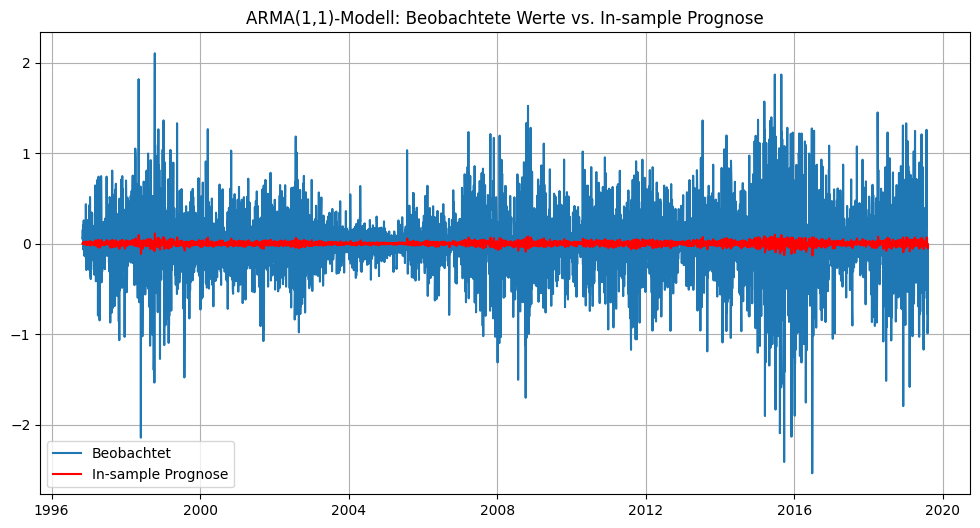

Akaike Information Criterion (AIC): 5180.9987
Bayesian Information Criterion (BIC): 5207.6907
#-#-#-#-#-#-#-# Schätzung ARIMA(1,1,1) Modell #-#-#-#-#-#-#-#
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5844
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2586.499
Date:                Sun, 11 May 2025   AIC                           5180.999
Time:                        22:41:08   BIC                           5207.691
Sample:                             0   HQIC                          5190.280
                               - 5844                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0028      0.005      0.533      0.594

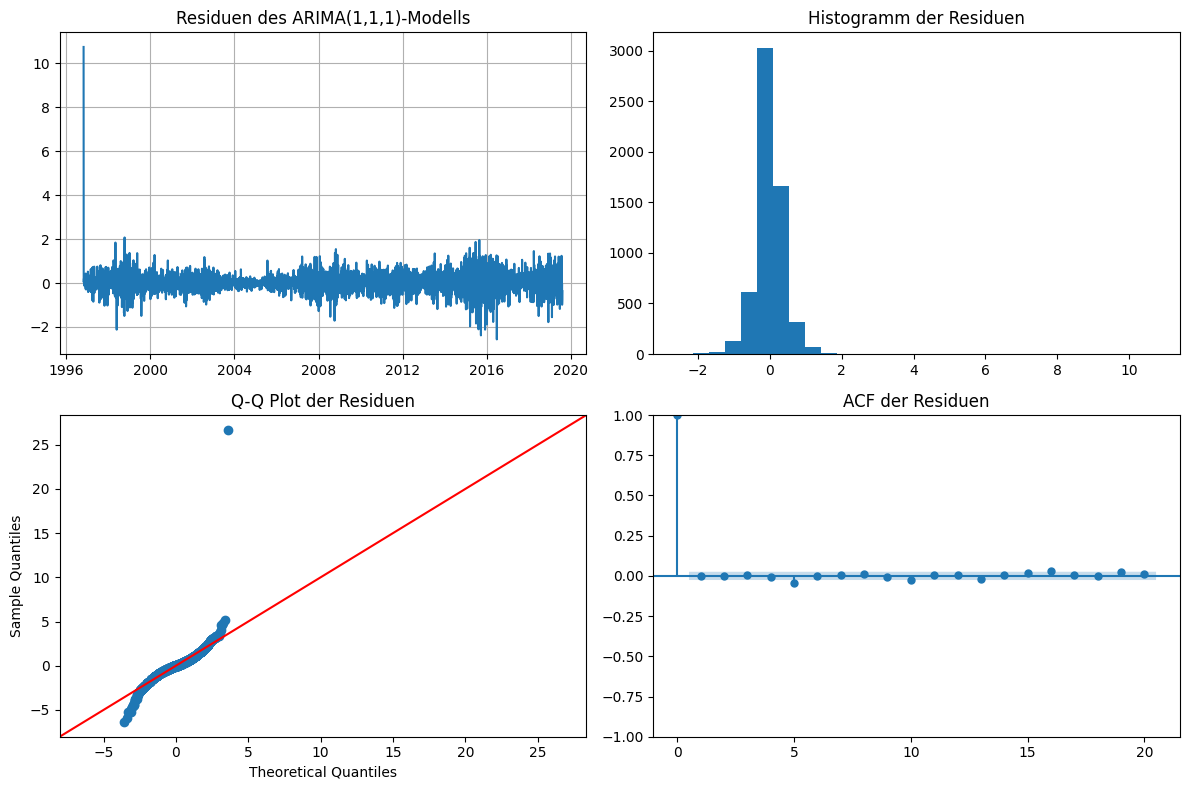

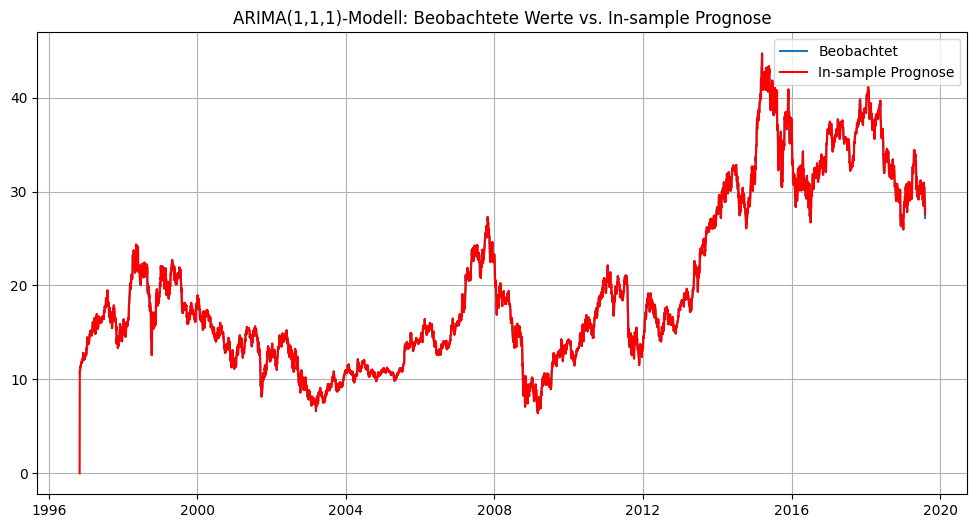

Akaike Information Criterion (AIC): 5180.9987
Bayesian Information Criterion (BIC): 5207.6907
#-#-#-#-#-#-#-# Grid Search für optimale ARIMA-Modelle #-#-#-#-#-#-#-#
ARIMA(0,1,0) - AIC: 5193.3168, BIC: 5206.6628
ARIMA(0,1,1) - AIC: 5179.1408, BIC: 5199.1598
ARIMA(0,1,2) - AIC: 5181.0228, BIC: 5207.7148
ARIMA(1,1,0) - AIC: 5179.0319, BIC: 5199.0509
ARIMA(1,1,1) - AIC: 5180.9987, BIC: 5207.6907
ARIMA(1,1,2) - AIC: 5183.0147, BIC: 5216.3797
ARIMA(2,1,0) - AIC: 5181.0027, BIC: 5207.6947
ARIMA(2,1,1) - AIC: 5183.0057, BIC: 5216.3707
ARIMA(2,1,2) - AIC: 5184.9734, BIC: 5225.0114

Top 5 Modelle nach AIC:
   p  d  q          AIC          BIC
3  1  1  0  5179.031854  5199.050853
1  0  1  1  5179.140774  5199.159773
4  1  1  1  5180.998691  5207.690689
6  2  1  0  5181.002656  5207.694655
2  0  1  2  5181.022796  5207.714794

Top 5 Modelle nach BIC:
   p  d  q          AIC          BIC
3  1  1  0  5179.031854  5199.050853
1  0  1  1  5179.140774  5199.159773
0  0  1  0  5193.316839  5206.662838
4

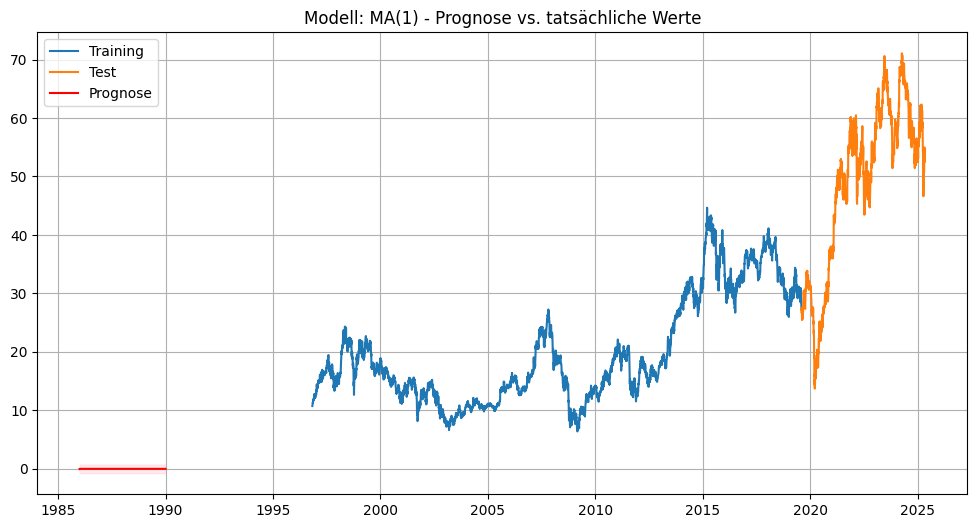

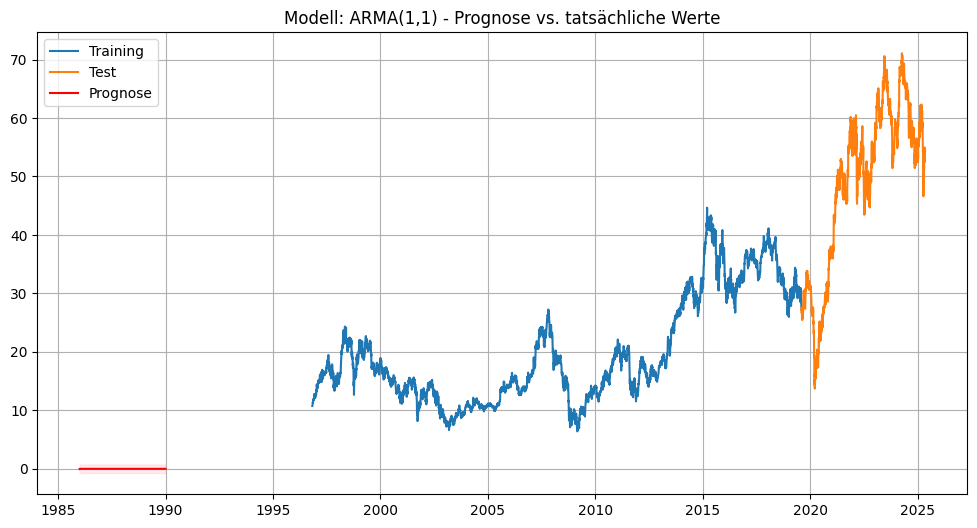

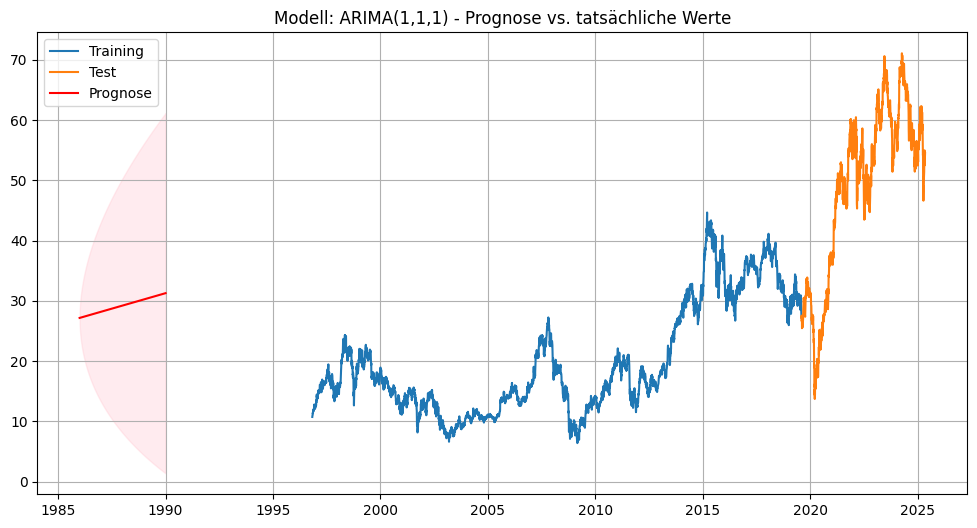

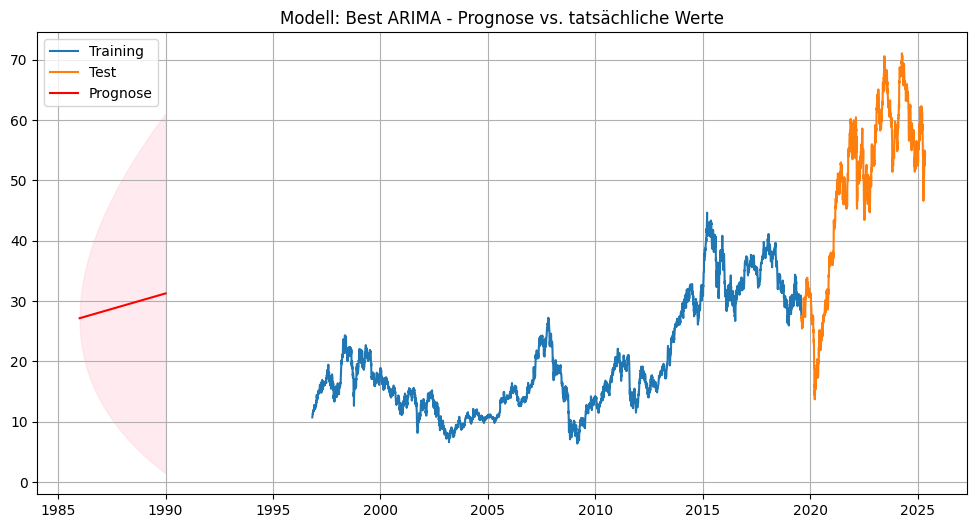


Modellvergleich sortiert nach AIC:
                      AIC          BIC  In-sample RMSE  Out-of-sample RMSE
Model                                                                     
Best ARIMA    5179.031854  5199.050853        0.402029                 NaN
MA(1)         5179.140774  5199.159773       21.694732                 NaN
ARIMA(1,1,1)  5180.998691  5207.690689        0.402028                 NaN
ARMA(1,1)     5180.998691  5207.690690       21.694711                 NaN

Modellvergleich sortiert nach BIC:
                      AIC          BIC  In-sample RMSE  Out-of-sample RMSE
Model                                                                     
Best ARIMA    5179.031854  5199.050853        0.402029                 NaN
MA(1)         5179.140774  5199.159773       21.694732                 NaN
ARIMA(1,1,1)  5180.998691  5207.690689        0.402028                 NaN
ARMA(1,1)     5180.998691  5207.690690       21.694711                 NaN

Modellvergleich sortiert na

In [10]:
########################################################
#-----------------------   4.   -----------------------#
#----------------- Modellspezifikation ----------------#
########################################################

#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-#-#-# Librarys #-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

#------------------------------------------------------#
#-#-#-#-#-#-#-#-# Daten vorbereiten #-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#

# Wir arbeiten mit der 'Close'-Spalte
ts = data_MBG_DE['Close']

# Aufteilung in Trainings- und Testdaten (80% Training, 20% Test)
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

print(f"Trainingsdaten: {len(train)} Beobachtungen")
print(f"Testdaten: {len(test)} Beobachtungen")

# Die stationäre Transformation basierend auf früheren Analysen
# Angenommen, d = 1 wurde als Integrationsordnung bestimmt
d = 1  # Ändere diesen Wert basierend auf deinen Ergebnissen

if d == 1:
    train_stationary = train.diff().dropna()
    test_stationary = test.diff().dropna()
elif d == 2:
    train_stationary = train.diff().diff().dropna()
    test_stationary = test.diff().diff().dropna()
else:  # d = 0
    train_stationary = train
    test_stationary = test

# Visualisierung von Trainings- und Testdaten
plt.figure(figsize=(12, 6))
plt.plot(train, label='Trainingsdaten')
plt.plot(test, label='Testdaten')
plt.title('Mercedes-Benz AG Aktienkurse - Aufteilung in Trainings- und Testdaten')
plt.legend()
plt.grid(True)
plt.show()

#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-# AR-Modelle #-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#

def fit_ar_model(train_data, p, include_constant=True):
    """
    Schätzt ein AR(p)-Modell
    
    Parameters:
    -----------
    train_data : pd.Series
        Stationäre Trainingsdaten
    p : int
        Ordnung des AR-Modells
    include_constant : bool
        Ob eine Konstante c im Modell enthalten sein soll
    
    Returns:
    --------
    model : AutoReg
        Geschätztes AR-Modell
    results : AutoRegResults
        Ergebnisse der Modellschätzung
    """
    print(f"#-#-#-#-#-#-#-# Schätzung AR({p}) Modell #-#-#-#-#-#-#-#")
    
    # AR-Modell schätzen
    model = AutoReg(train_data, lags=p, trend='c' if include_constant else 'n')
    results = model.fit()
    
    # Modellparameter ausgeben
    print(results.summary())
    
    # Stationaritätsbedingung prüfen
    if p == 1:
        ar_coef = results.params[1] if include_constant else results.params[0]
        if abs(ar_coef) < 1:
            print(f"AR(1) Koeffizient: {ar_coef:.4f}")
            print(f"Stationaritätsbedingung erfüllt: |φ| = {abs(ar_coef):.4f} < 1")
        else:
            print(f"AR(1) Koeffizient: {ar_coef:.4f}")
            print(f"Stationaritätsbedingung NICHT erfüllt: |φ| = {abs(ar_coef):.4f} >= 1")
    elif p == 2:
        ar1_coef = results.params[1] if include_constant else results.params[0]
        ar2_coef = results.params[2] if include_constant else results.params[1]
        print(f"AR(2) Koeffizienten: φ₁ = {ar1_coef:.4f}, φ₂ = {ar2_coef:.4f}")
        
        # Charakteristische Wurzeln berechnen
        # Das charakteristische Polynom ist: 1 - φ₁z - φ₂z²
        # Die Wurzeln sind die Lösungen von: φ₂z² + φ₁z - 1 = 0
        a = ar2_coef
        b = ar1_coef
        c = -1
        
        # Diskriminante
        discriminant = b**2 - 4*a*c
        
        if discriminant >= 0:
            root1 = (-b + np.sqrt(discriminant)) / (2*a)
            root2 = (-b - np.sqrt(discriminant)) / (2*a)
            print(f"Charakteristische Wurzeln: z₁ = {root1:.4f}, z₂ = {root2:.4f}")
            
            if abs(root1) > 1 and abs(root2) > 1:
                print("Stationaritätsbedingung erfüllt: Beide Wurzeln liegen außerhalb des Einheitskreises.")
            else:
                print("Stationaritätsbedingung NICHT erfüllt: Mindestens eine Wurzel liegt innerhalb des Einheitskreises.")
        else:
            complex_part = np.sqrt(-discriminant) / (2*a)
            real_part = -b / (2*a)
            print(f"Charakteristische Wurzeln: z₁ = {real_part:.4f} + {complex_part:.4f}i, z₂ = {real_part:.4f} - {complex_part:.4f}i")
            
            if abs(complex(real_part, complex_part)) > 1:
                print("Stationaritätsbedingung erfüllt: Komplexe Wurzeln liegen außerhalb des Einheitskreises.")
            else:
                print("Stationaritätsbedingung NICHT erfüllt: Komplexe Wurzeln liegen innerhalb des Einheitskreises.")
    
    # Residuen analysieren
    residuals = results.resid
    
    # Plot der Residuen
    plt.figure(figsize=(12, 8))
    
    plt.subplot(221)
    plt.plot(residuals)
    plt.title(f'Residuen des AR({p})-Modells')
    plt.grid(True)
    
    plt.subplot(222)
    plt.hist(residuals, bins=30)
    plt.title('Histogramm der Residuen')
    
    plt.subplot(223)
    sm.graphics.qqplot(residuals, line='45', fit=True, ax=plt.gca())
    plt.title('Q-Q Plot der Residuen')
    
    plt.subplot(224)
    from statsmodels.graphics.tsaplots import plot_acf
    plot_acf(residuals, lags=20, ax=plt.gca())
    plt.title('ACF der Residuen')
    
    plt.tight_layout()
    plt.show()
    
    # In-sample Prognose berechnen
    in_sample_predictions = results.fittedvalues
    
    # In-sample Prognose plotten
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label='Beobachtet')
    plt.plot(in_sample_predictions, color='red', label='In-sample Prognose')
    plt.title(f'AR({p})-Modell: Beobachtete Werte vs. In-sample Prognose')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Informationskriterien
    print(f"Akaike Information Criterion (AIC): {results.aic:.4f}")
    print(f"Bayesian Information Criterion (BIC): {results.bic:.4f}")
    
    return model, results

#------------------------------------------------------#
#-#-#-#-#-#-#-#-#-# MA-Modelle #-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#

def fit_ma_model(train_data, q, include_constant=True):
    """
    Schätzt ein MA(q)-Modell
    
    Parameters:
    -----------
    train_data : pd.Series
        Stationäre Trainingsdaten
    q : int
        Ordnung des MA-Modells
    include_constant : bool
        Ob eine Konstante c im Modell enthalten sein soll
    
    Returns:
    --------
    model : ARIMA
        Geschätztes MA-Modell (als ARIMA(0,0,q))
    results : ARIMAResults
        Ergebnisse der Modellschätzung
    """
    print(f"#-#-#-#-#-#-#-# Schätzung MA({q}) Modell #-#-#-#-#-#-#-#")
    
    # MA-Modell als ARIMA(0,0,q) schätzen
    model = ARIMA(train_data, order=(0, 0, q), trend='c' if include_constant else 'n')
    results = model.fit()
    
    # Modellparameter ausgeben
    print(results.summary())
    
    # Residuen analysieren
    residuals = results.resid
    
    # Plot der Residuen
    plt.figure(figsize=(12, 8))
    
    plt.subplot(221)
    plt.plot(residuals)
    plt.title(f'Residuen des MA({q})-Modells')
    plt.grid(True)
    
    plt.subplot(222)
    plt.hist(residuals, bins=30)
    plt.title('Histogramm der Residuen')
    
    plt.subplot(223)
    sm.graphics.qqplot(residuals, line='45', fit=True, ax=plt.gca())
    plt.title('Q-Q Plot der Residuen')
    
    plt.subplot(224)
    from statsmodels.graphics.tsaplots import plot_acf
    plot_acf(residuals, lags=20, ax=plt.gca())
    plt.title('ACF der Residuen')
    
    plt.tight_layout()
    plt.show()
    
    # In-sample Prognose berechnen
    in_sample_predictions = results.fittedvalues
    
    # In-sample Prognose plotten
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label='Beobachtet')
    plt.plot(in_sample_predictions, color='red', label='In-sample Prognose')
    plt.title(f'MA({q})-Modell: Beobachtete Werte vs. In-sample Prognose')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Informationskriterien
    print(f"Akaike Information Criterion (AIC): {results.aic:.4f}")
    print(f"Bayesian Information Criterion (BIC): {results.bic:.4f}")
    
    return model, results

#------------------------------------------------------#
#-#-#-#-#-#-#-#-# ARMA-Modelle #-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#

def fit_arma_model(train_data, p, q, include_constant=True):
    """
    Schätzt ein ARMA(p,q)-Modell
    
    Parameters:
    -----------
    train_data : pd.Series
        Stationäre Trainingsdaten
    p : int
        Ordnung des AR-Teils
    q : int
        Ordnung des MA-Teils
    include_constant : bool
        Ob eine Konstante c im Modell enthalten sein soll
    
    Returns:
    --------
    model : ARIMA
        Geschätztes ARMA-Modell (als ARIMA(p,0,q))
    results : ARIMAResults
        Ergebnisse der Modellschätzung
    """
    print(f"#-#-#-#-#-#-#-# Schätzung ARMA({p},{q}) Modell #-#-#-#-#-#-#-#")
    
    # ARMA-Modell als ARIMA(p,0,q) schätzen
    model = ARIMA(train_data, order=(p, 0, q), trend='c' if include_constant else 'n')
    results = model.fit()
    
    # Modellparameter ausgeben
    print(results.summary())
    
    # Residuen analysieren
    residuals = results.resid
    
    # Plot der Residuen
    plt.figure(figsize=(12, 8))
    
    plt.subplot(221)
    plt.plot(residuals)
    plt.title(f'Residuen des ARMA({p},{q})-Modells')
    plt.grid(True)
    
    plt.subplot(222)
    plt.hist(residuals, bins=30)
    plt.title('Histogramm der Residuen')
    
    plt.subplot(223)
    sm.graphics.qqplot(residuals, line='45', fit=True, ax=plt.gca())
    plt.title('Q-Q Plot der Residuen')
    
    plt.subplot(224)
    from statsmodels.graphics.tsaplots import plot_acf
    plot_acf(residuals, lags=20, ax=plt.gca())
    plt.title('ACF der Residuen')
    
    plt.tight_layout()
    plt.show()
    
    # In-sample Prognose berechnen
    in_sample_predictions = results.fittedvalues
    
    # In-sample Prognose plotten
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label='Beobachtet')
    plt.plot(in_sample_predictions, color='red', label='In-sample Prognose')
    plt.title(f'ARMA({p},{q})-Modell: Beobachtete Werte vs. In-sample Prognose')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Informationskriterien
    print(f"Akaike Information Criterion (AIC): {results.aic:.4f}")
    print(f"Bayesian Information Criterion (BIC): {results.bic:.4f}")
    
    return model, results

#------------------------------------------------------#
#-#-#-#-#-#-#-#-# ARIMA-Modelle #-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#

def fit_arima_model(train_data, p, d, q, include_constant=True):
    """
    Schätzt ein ARIMA(p,d,q)-Modell
    
    Parameters:
    -----------
    train_data : pd.Series
        Originale (nicht-differenzierte) Trainingsdaten
    p : int
        Ordnung des AR-Teils
    d : int
        Integrationsordnung
    q : int
        Ordnung des MA-Teils
    include_constant : bool
        Ob eine Konstante c im Modell enthalten sein soll
    
    Returns:
    --------
    model : ARIMA
        Geschätztes ARIMA-Modell
    results : ARIMAResults
        Ergebnisse der Modellschätzung
    """
    print(f"#-#-#-#-#-#-#-# Schätzung ARIMA({p},{d},{q}) Modell #-#-#-#-#-#-#-#")
    
    # ARIMA-Modell schätzen
    if d > 0 and include_constant:
        # Bei d > 0 verwenden wir einen linearen Trend statt einer Konstante
        model = ARIMA(train_data, order=(p, d, q), trend='t')
    else:
        model = ARIMA(train_data, order=(p, d, q), trend='c' if include_constant else 'n')

    results = model.fit()
    
    # Modellparameter ausgeben
    print(results.summary())
    
    # Residuen analysieren
    residuals = results.resid
    
    # Plot der Residuen
    plt.figure(figsize=(12, 8))
    
    plt.subplot(221)
    plt.plot(residuals)
    plt.title(f'Residuen des ARIMA({p},{d},{q})-Modells')
    plt.grid(True)
    
    plt.subplot(222)
    plt.hist(residuals, bins=30)
    plt.title('Histogramm der Residuen')
    
    plt.subplot(223)
    sm.graphics.qqplot(residuals, line='45', fit=True, ax=plt.gca())
    plt.title('Q-Q Plot der Residuen')
    
    plt.subplot(224)
    from statsmodels.graphics.tsaplots import plot_acf
    plot_acf(residuals, lags=20, ax=plt.gca())
    plt.title('ACF der Residuen')
    
    plt.tight_layout()
    plt.show()
    
    # In-sample Prognose berechnen
    in_sample_predictions = results.fittedvalues
    
    # In-sample Prognose plotten
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label='Beobachtet')
    plt.plot(in_sample_predictions, color='red', label='In-sample Prognose')
    plt.title(f'ARIMA({p},{d},{q})-Modell: Beobachtete Werte vs. In-sample Prognose')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Informationskriterien
    print(f"Akaike Information Criterion (AIC): {results.aic:.4f}")
    print(f"Bayesian Information Criterion (BIC): {results.bic:.4f}")
    
    return model, results

#------------------------------------------------------#
#-#-#-#-#-# Grid Search für optimale Modelle #-#-#-#-#-#
#------------------------------------------------------#

def grid_search_arima(train_data, p_range, d_range, q_range, include_constant=True):
    """
    Führt eine Grid-Suche nach dem optimalen ARIMA-Modell durch
    
    Parameters:
    -----------
    train_data : pd.Series
        Trainigsdaten (nicht differenziert)
    p_range : list
        Bereich der AR-Ordnungen
    d_range : list
        Bereich der Integrationsordnungen
    q_range : list
        Bereich der MA-Ordnungen
    include_constant : bool
        Ob eine Konstante im Modell enthalten sein soll
    
    Returns:
    --------
    best_model : ARIMA
        Bestes ARIMA-Modell basierend auf AIC
    best_results : ARIMAResults
        Ergebnisse der Modellschätzung für das beste Modell
    results_table : pd.DataFrame
        Tabelle mit AIC, BIC für alle getesteten Modelle
    """
    print("#-#-#-#-#-#-#-# Grid Search für optimale ARIMA-Modelle #-#-#-#-#-#-#-#")
    
    results_list = []
    best_aic = float("inf")
    best_bic = float("inf")
    best_model = None
    best_results = None
    best_order_aic = None
    best_order_bic = None
    
    # Alle Kombinationen von p, d, q testen
    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            if d > 0 and include_constant:
                model = ARIMA(train_data, order=(p, d, q), trend='t')
            else:
                model = ARIMA(train_data, order=(p, d, q), trend='c' if include_constant else 'n')
                
            results = model.fit()
            
            # Ergebnisse speichern
            results_list.append({
                'p': p,
                'd': d,
                'q': q,
                'AIC': results.aic,
                'BIC': results.bic
            })
            
            # Bestes Modell nach AIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_model_aic = model
                best_results_aic = results
                best_order_aic = (p, d, q)
            
            # Bestes Modell nach BIC
            if results.bic < best_bic:
                best_bic = results.bic
                best_model_bic = model
                best_results_bic = results
                best_order_bic = (p, d, q)
            
            print(f"ARIMA({p},{d},{q}) - AIC: {results.aic:.4f}, BIC: {results.bic:.4f}")
        
        except Exception as e:
            print(f"Fehler bei ARIMA({p},{d},{q}): {e}")
    
    # Ergebnisse als DataFrame
    results_table = pd.DataFrame(results_list)
    results_table = results_table.sort_values('AIC')
    
    print("\nTop 5 Modelle nach AIC:")
    print(results_table.head(5))
    
    print("\nTop 5 Modelle nach BIC:")
    print(results_table.sort_values('BIC').head(5))
    
    print(f"\nBestes Modell nach AIC: ARIMA{best_order_aic} mit AIC = {best_aic:.4f}")
    print(f"Bestes Modell nach BIC: ARIMA{best_order_bic} mit BIC = {best_bic:.4f}")
    
    # Wir geben das beste Modell nach AIC zurück, aber du kannst auch das beste nach BIC wählen
    return best_model_aic, best_results_aic, results_table

#------------------------------------------------------#
#-#-#-#-#-#-#-# Modelle testen #-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#

# Basierend auf deinen Ergebnissen der ACF und PACF Analyse
# solltest du geeignete Werte für p und q haben.
# Hier zeigen wir einige Beispielmodelle:

# Beispiel: Schätze AR(1) Modell
ar1_model, ar1_results = fit_ar_model(train_stationary, p=1)

# Beispiel: Schätze MA(1) Modell
ma1_model, ma1_results = fit_ma_model(train_stationary, q=1)

# Beispiel: Schätze ARMA(1,1) Modell
arma11_model, arma11_results = fit_arma_model(train_stationary, p=1, q=1)

# Beispiel: Schätze ARIMA(1,1,1) Modell
# Beachte: Wir verwenden hier die originalen (nicht differenzierten) Trainingsdaten,
# da die Differenzierung im ARIMA-Modell selbst durchgeführt wird
arima111_model, arima111_results = fit_arima_model(train, p=1, d=1, q=1)

# Grid Search für optimale ARIMA-Modelle
# Dies kann einige Zeit dauern, abhängig von der Anzahl der getesteten Modelle
best_model, best_results, results_table = grid_search_arima(
    train,
    p_range=range(0, 3),  # AR-Ordnungen 0 bis 2
    d_range=[d],          # Die bereits bestimmte Integrationsordnung
    q_range=range(0, 3)   # MA-Ordnungen 0 bis 2
)

#------------------------------------------------------#
#-#-#-#-#-#-#-# Modellvergleich #-#-#-#-#-#-#-#-#-#-#-#
#------------------------------------------------------#

def compare_models(models_dict, train_data, test_data, d=0):
    """
    Vergleicht verschiedene Modelle anhand von in-sample und out-of-sample Metriken
    """
    print("#-#-#-#-#-#-#-# Modellvergleich #-#-#-#-#-#-#-#")
    
    results = []
    
    for name, result in models_dict.items():
        # In-sample Fehler
        in_sample_mse = mean_squared_error(train_data[result.fittedvalues.index], result.fittedvalues)
        in_sample_rmse = sqrt(in_sample_mse)
        
        # Out-of-sample Prognose
        try:
            # Für ARIMA/ARMA Modelle
            if hasattr(result, 'get_forecast'):
                forecast = result.get_forecast(steps=len(test_data))
                forecast_mean = forecast.predicted_mean
                confidence_intervals = forecast.conf_int(alpha=0.05)
            # Für AR Modelle
            elif hasattr(result, 'forecast'):
                forecast_mean = result.forecast(steps=len(test_data))
                # Bei AR Modellen müssen wir die Konfidenzintervalle manuell berechnen
                forecast_std = np.sqrt(result.mse) * np.sqrt(1 + np.arange(len(test_data)))
                ci_lower = forecast_mean - 1.96 * forecast_std
                ci_upper = forecast_mean + 1.96 * forecast_std
                confidence_intervals = pd.DataFrame({
                    'lower': ci_lower,
                    'upper': ci_upper
                }, index=test_data.index)
            else:
                print(f"Modell {name} unterstützt keine Prognosen. Überspringe...")
                continue
        except Exception as e:
            print(f"Fehler bei Prognose für Modell {name}: {e}")
            continue
            
        # Out-of-sample Fehler
        # Wir berechnen den Fehler nur für die Zeitpunkte, für die wir Prognosen haben
        common_index = test_data.index.intersection(forecast_mean.index)
        if len(common_index) > 0:
            out_sample_mse = mean_squared_error(test_data[common_index], forecast_mean[common_index])
            out_sample_rmse = sqrt(out_sample_mse)
        else:
            out_sample_mse = out_sample_rmse = float('nan')
        
        # Informationskriterien
        aic = result.aic
        bic = result.bic
        
        # Ergebnisse sammeln
        results.append({
            'Model': name,
            'AIC': aic,
            'BIC': bic,
            'In-sample RMSE': in_sample_rmse,
            'Out-of-sample RMSE': out_sample_rmse
        })
        
        # Prognosen visualisieren
        plt.figure(figsize=(12, 6))
        plt.plot(train_data, label='Training')
        plt.plot(test_data, label='Test')
        plt.plot(forecast_mean, label='Prognose', color='red')
        
        # Konfidenzintervalle
        plt.fill_between(
            confidence_intervals.index,
            confidence_intervals.iloc[:, 0],
            confidence_intervals.iloc[:, 1],
            color='pink', alpha=0.3
        )
        
        plt.title(f'Modell: {name} - Prognose vs. tatsächliche Werte')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    # Ergebnisse als DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.set_index('Model')
    
    # Sortieren nach Information Criterion
    print("\nModellvergleich sortiert nach AIC:")
    print(results_df.sort_values('AIC'))
    
    print("\nModellvergleich sortiert nach BIC:")
    print(results_df.sort_values('BIC'))
    
    print("\nModellvergleich sortiert nach Out-of-sample RMSE:")
    print(results_df.sort_values('Out-of-sample RMSE'))
    
    return results_df

# Modelle für den Vergleich vorbereiten
models_dict = {
    'AR(1)': ar1_results,
    'MA(1)': ma1_results,
    'ARMA(1,1)': arma11_results,
    'ARIMA(1,1,1)': arima111_results,
    'Best ARIMA': best_results
}

# Modelle vergleichen
comparison_results = compare_models(models_dict, train, test, d=d)

#------------------------------------------------------#

---

## 5. Modelldiagnose
### Ljung-Box Test (Portmanteau Test)
- Testet, ob Residuen autokorreliert sind
- Teststatistik: $Q = n(n+2)\sum_{k=1}^h \frac{\hat{\rho}_k^2}{n-k}$
- Nullhypothese: Residuen sind unkorreliert (white noise)
- Interpretation: p-Wert > 0.05 bedeutet, dass Residuen nicht autokorreliert sind

### Jarque-Bera Test
- Testet auf Normalverteilung der Residuen
- Teststatistik: $JB = \frac{n}{6}\left(S^2 + \frac{(K-3)^2}{4}\right)$
  wobei S die Schiefe und K die Kurtosis ist
- Nullhypothese: Residuen sind normalverteilt
- Interpretation: p-Wert > 0.05 bedeutet, dass Residuen normalverteilt sind

### Residuenanalyse
- Visuelle Inspektion: Zeitreihenplot, Histogramm, Q-Q-Plot
- Prüfen auf konstante Varianz (Homoskedastizität)

In [ ]:
########################################################
#-----------------------   5.   -----------------------#
#------------------- Modelldiagnose -------------------#
########################################################

---

## 6. Modellselektion
### Informationskriterien
- Akaike Information Criterion (AIC): $AIC = -2\log(L) + 2k$
- Bayesian Information Criterion (BIC): $BIC = -2\log(L) + k\log(n)$
  wobei L die Likelihood, k die Anzahl der Parameter und n die Stichprobengröße ist
- Auswahl des Modells mit niedrigstem AIC/BIC-Wert

### Box-Jenkins-Methode
- Prinzip "From General to Specific": Start mit umfassendem Modell, dann Vereinfachung
- Sparsamkeitsprinzip: Einfachere Modelle sind stabiler und oft besser

In [ ]:
########################################################
#-----------------------   6.   -----------------------#
#------------------ Modellselektion -------------------#
########################################################

---

## 7. Prognose
### Punktprognosen
- Vorhersagen für zukünftige Zeitreihenwerte
- Für AR(1): $\hat{y}_{T+1} = c + \phi \cdot y_T$
- Für AR(2): $\hat{y}_{T+1} = c + \phi_1 \cdot y_T + \phi_2 \cdot y_{T-1}$

### Konfidenzintervalle
- In der Regel 95%-Konfidenzintervalle für Prognosen
- Berechnung: $\hat{y}_{T+h} \pm 1.96 \sqrt{Var(\hat{y}_{T+h})}$
- Berücksichtigen Unsicherheit des Modells und der Parameter

In [ ]:
########################################################
#-----------------------   7.   -----------------------#
#---------------------- Prognose ----------------------#
########################################################